<h1 align="center">Mechanical Fatigue of Steel</h1>

![Fatigue Image 1](https://dieselship.com/wp-content/uploads/2016/04/fatigue.gif)
![Fatigue Image 2](https://yenaengineering.nl/wp-content/uploads/2020/12/metal-fatigue.png)

Welcome to our journey to understand and predict the mechanical fatigue of steel, a critical factor in various industrial applications. In this project, we dive deep into the world of data science and machine learning to develop a model that can accurately anticipate when fatigue might occur in steel components.

**Project Objective:**
Mechanical fatigue is the weakening of a material caused by repeated loading and unloading. It's a common problem in engineering, as it can lead to the failure of structural components, machinery, and more. Our goal is to build a predictive model that can help us foresee when and where fatigue might appear in steel structures. By doing so, we aim to prevent costly failures, ensure safety, and optimize maintenance schedules.

**The Challenge:**
Steel is a versatile and robust material widely used in industrial contexts. However, the complex interplay of various factors, such as temperature, stress, and manufacturing variability, makes fatigue prediction a challenging task. To tackle this, we will explore multiple machine learning models, including linear regression, regularization, k-nearest neighbors (KNN), gradient boosting machines (GBM), XgBoost, and CatBoost. Each model offers a unique approach to solving the problem.

**What's Ahead:**
In this project, we will take you through the entire data science pipeline. From data collection and preprocessing to model building and evaluation, we will explore each step in detail. We will also explain our choices, why we selected specific models, and what insights we gain along the way.


**Problems with Traditional Methods of Calculating Fatigue:**

**Stress-Life Method (S-N Curve):**
An S-N curve defines the number of cycles to failure, N(S), when a material is repeatedly cycled through a given stress range S.
- **Disadvantages:**
    - **Expensive Experimental Testing:** Constructing an accurate S-N curve requires extensive and costly experimental testing, especially for different materials and conditions.
    - **Time-Consuming:** Experimentally determining the curve for each material can be time-intensive.
    - **Limited Generalization:** S-N curves are specific to particular materials and conditions, limiting their generalizability to new materials or situations.
- **How ML Can Help:**
    - **ML can predict fatigue life** without the need for costly and time-consuming experimental tests.
    - It can generalize well to new materials by learning from diverse datasets.

**Basquin's Equation:**
N = (A / (σ^m))^1/B
Where:
N is the number of cycles to failure.
A, B, m are material-specific constants.
σ is the applied stress.
- **Disadvantages:**
    - **Material-Specific Constants:** A and B in Basquin's equation are material-specific constants that must be determined through experimentation, which can be resource-intensive.
    - **Limited Applicability:** The equation may not be suitable for all materials or complex loading conditions.
    - **Simplified Model:** Basquin's equation assumes a simplified relationship between stress and fatigue life.
- **How ML Can Help:**
    - **ML models can learn complex relationships** between material properties and fatigue life without relying on simplified equations.
    - They can predict fatigue life for a broader range of materials and conditions.

**Miner's Rule:**
Miner's rule uses the sum of the ratio of the number of cycles at each amplitude (n) over the number of cycles to failure (N) at that respective amplitude on a Woehler curve. The sum of these ratios yields total damage.
- **Disadvantages:**
    - **Cumulative Damage Assumption:** Miner's Rule makes a simplifying assumption that damage from different load cycles is additive, which may not be accurate for all materials or situations.
    - **Complex Calculation:** Calculating damage ratios and summing them for multiple loads can be computationally intensive for large datasets or complex load histories.
- **How ML Can Help:**
    - ML can **capture nonlinear interactions** between load cycles and damage more accurately.
    - It can handle complex calculations efficiently and adapt to various loading conditions.



In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\1832983198.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
# importing dataset 
df = pd.read_csv("Fatigue Dataset for Steel.csv")

In [3]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.21,0.44,0.017,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.27,0.43,0.008,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.23,0.51,0.018,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.19,0.42,0.026,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


### This database comprises : 
 Carbon steels &  Low-alloy steels (371 rows) <br>
 Carburizing steels (48 rows)<br>
 Spring steels (18 rows)

### The features in the dataset can be categorized into the following:

**Chemical composition:**
- %C: Carbon content (wt. %)
- %Si: Silicon content (wt. %)
- %Mn: Manganese content (wt. %)
- %P: Phosphorus content (wt. %)
- %S: Sulphur content (wt. %)
- %Ni: Nickel content (wt. %)
- %Cr: Chromium content (wt. %)
- %Cu: Copper content (wt. %)
- %Mo: Molybdenum content (wt. %)

**Upstream processing details:**
- Ingot size
- Reduction ratio
- Non-metallic inclusions (Agrawal et al.)

**Heat treatment conditions:**
- Temperature
- Time
- Other process conditions for:
  - Normalizing
  - Through-hardening
  - Carburizing-quenching
  - Tempering processes

**Mechanical properties:**
- YS: Yield Strength
- UTS: Ultimate Tensile Strength
- %EL: Percentage Elongation
- %RA: Percentage Reduction in Area
- Hardness
- Charpy Impact Value (J/cm²)
- Fatigue Strength


### Brief Definition of all the columns
- **C (%):** 
  - Abbreviation: Carbon content (wt. %)
  - Explanation: The percentage of carbon in the material, a key factor influencing its properties and behavior.

- **Si (%):** 
  - Abbreviation: Silicon content (wt. %)
  - Explanation: The percentage of silicon in the material, affecting properties like strength and heat resistance.

- **Mn (%):** 
  - Abbreviation: Manganese content (wt. %)
  - Explanation: The percentage of manganese in the material, influencing its strength and hardenability.

- **P (%):** 
  - Abbreviation: Phosphorus content (wt. %)
  - Explanation: The percentage of phosphorus in the material, which can affect its brittleness and strength.

- **S (%):** 
  - Abbreviation: Sulphur content (wt. %)
  - Explanation: The percentage of sulfur in the material, impacting machinability and toughness.

- **Ni (%):** 
  - Abbreviation: Nickel content (wt. %)
  - Explanation: The percentage of nickel in the material, contributing to corrosion resistance and strength.

- **Cr (%):** 
  - Abbreviation: Chromium content (wt. %)
  - Explanation: The percentage of chromium in the material, enhancing its corrosion resistance and durability.

- **Cu (%):** 
  - Abbreviation: Copper content (wt. %)
  - Explanation: The percentage of copper in the material, influencing electrical conductivity and corrosion resistance.

- **Mo (%):** 
  - Abbreviation: Molybdenum content (wt. %)
  - Explanation: The percentage of molybdenum in the material, improving strength and high-temperature performance.

- **NT:** 
  - Abbreviation: Normalizing Temperature
  - Explanation: The temperature at which the material is subjected to the normalizing heat treatment process.

- **THT:** 
  - Abbreviation: Through Hardening Temperature
  - Explanation: The temperature for the through-hardening heat treatment process, enhancing material hardness.

- **THt:** 
  - Abbreviation: Through Hardening Time
  - Explanation: The duration for the through-hardening heat treatment process, affecting material strength.

- **THQCr:** 
  - Abbreviation: Cooling Rate for Through Hardening
  - Explanation: The rate at which the material is cooled during through-hardening, influencing hardness and toughness.

- **CT:** 
  - Abbreviation: Carburization Temperature
  - Explanation: The temperature at which carburization is performed, increasing surface carbon content.

- **Ct:** 
  - Abbreviation: Carburization Time
  - Explanation: The time for the carburization process, enhancing surface hardness.

- **DT:** 
  - Abbreviation: Diffusion Temperature
  - Explanation: The temperature during the diffusion process, promoting even distribution of elements.

- **Dt:** 
  - Abbreviation: Diffusion time
  - Explanation: The duration of the diffusion process, affecting surface properties.

- **QmT:** 
  - Abbreviation: Quenching Media Temperature
  - Explanation: The temperature of the quenching medium used in carburization, influencing material hardness.

- **TT:** 
  - Abbreviation: Tempering Temperature
  - Explanation: The temperature at which tempering is performed, affecting material toughness.

- **Tt:** 
  - Abbreviation: Tempering Time
  - Explanation: The duration of the tempering process, impacting material strength and ductility.

- **TCr:** 
  - Abbreviation: Cooling Rate for Tempering
  - Explanation: The rate at which the material is cooled during tempering, influencing its final properties.

- **RedRatio:** 
  - Abbreviation: Reduction Ratio (Ingot to Bar)
  - Explanation: The ratio by which the material is reduced in size from ingot to bar form.

- **dA:** 
  - Abbreviation: Area Proportion of Inclusions Deformed by Plastic Work
  - Explanation: The proportion of inclusions deformed during plastic work processes.

- **dB:** 
  - Abbreviation: Area Proportion of Inclusions Occurring in Discontinuous Array
  - Explanation: The proportion of inclusions occurring in a discontinuous array within the material.

- **dC:** 
  - Abbreviation: Area Proportion of Isolated Inclusions
  - Explanation: The proportion of isolated inclusions within the material.

- **Fatigue:** 
  - Abbreviation: Rotating Bending Fatigue Strength (10^7 Cycles)
  - Explanation: The material's ability to withstand fatigue failure under cyclic loading, typically measured over 10^7 cycles.


In [4]:
df.shape

(437, 27)

In [5]:
df.columns

Index(['Sl. No.', 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo',
       'RedRatio', 'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

In [6]:
df.drop('Sl. No.',axis =1,inplace = True)

In [7]:
# checking for null values 
df.isnull().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

In [9]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000
TT,437.0,536.842105,164.101963,30.000,550.000,600.000,650.000,680.000


<Axes: >

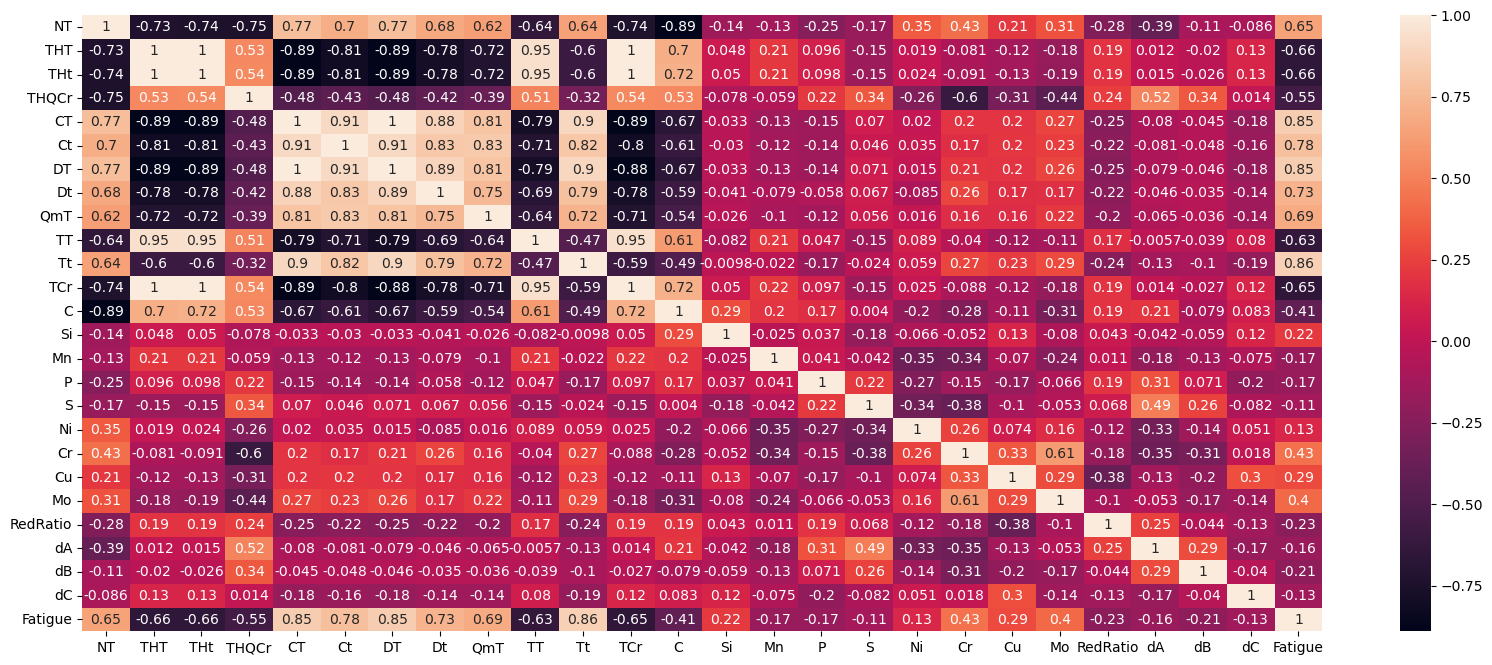

In [10]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(),annot=True)

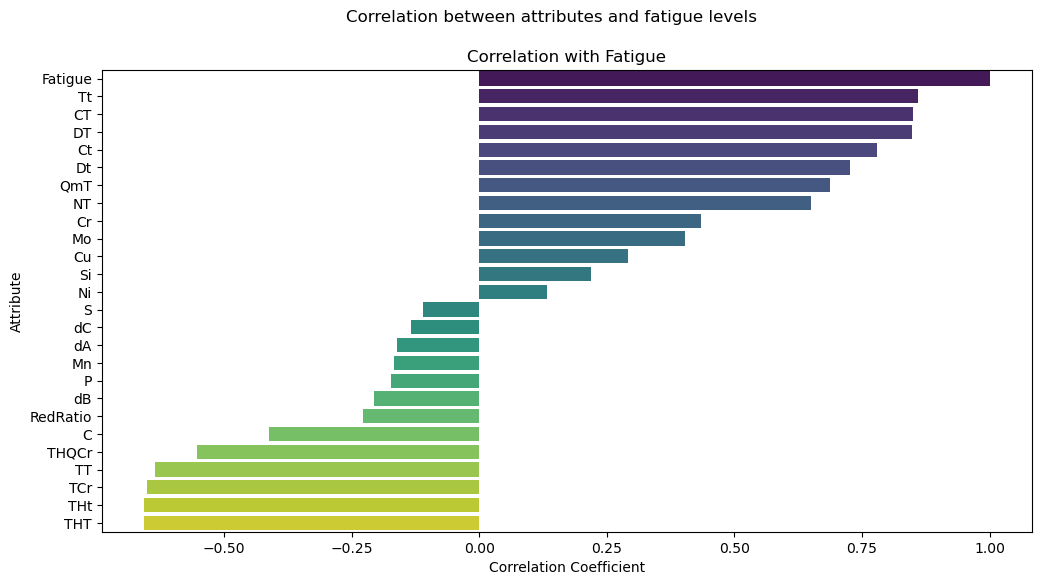

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
correlation_with_fatigue = df.corr()["Fatigue"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_fatigue.values, y=correlation_with_fatigue.index, palette="viridis")
plt.title("Correlation with Fatigue")
plt.xlabel("Correlation")
plt.ylabel("Attribute")

# Adding units, multipliers, and a caption
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute")
plt.title("Correlation with Fatigue")
plt.suptitle("Correlation between attributes and fatigue levels")
plt.show()

In [13]:
# profile_report = pp.ProfileReport(df)
# profile_report

In [14]:
# Data visualization 

Histogram of Carbon content 

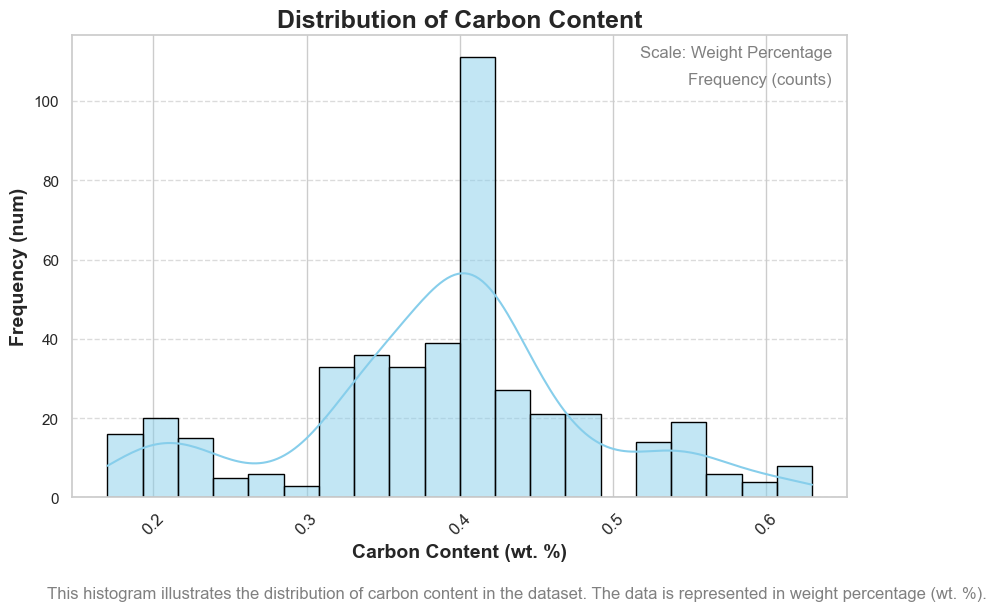

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram
sns.histplot(data=df, x='C', bins=20, kde=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title("Distribution of Carbon Content", fontsize=18, weight='bold')
plt.xlabel("Carbon Content (wt. %)", fontsize=14, weight='bold')
plt.ylabel("Frequency (num)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Weight Percentage", transform=ax.transAxes, fontsize=12, color='gray', ha='right', va='top')
plt.text(0.98, 0.92, "Frequency (counts)", transform=ax.transAxes, fontsize=12, color='gray', ha='right', va='top')

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.1, -0.05, "This histogram illustrates the distribution of carbon content in the dataset. The data is represented in weight percentage (wt. %).", fontsize=12, ha='left', va='center', color='gray')

# Show the plot
plt.show()



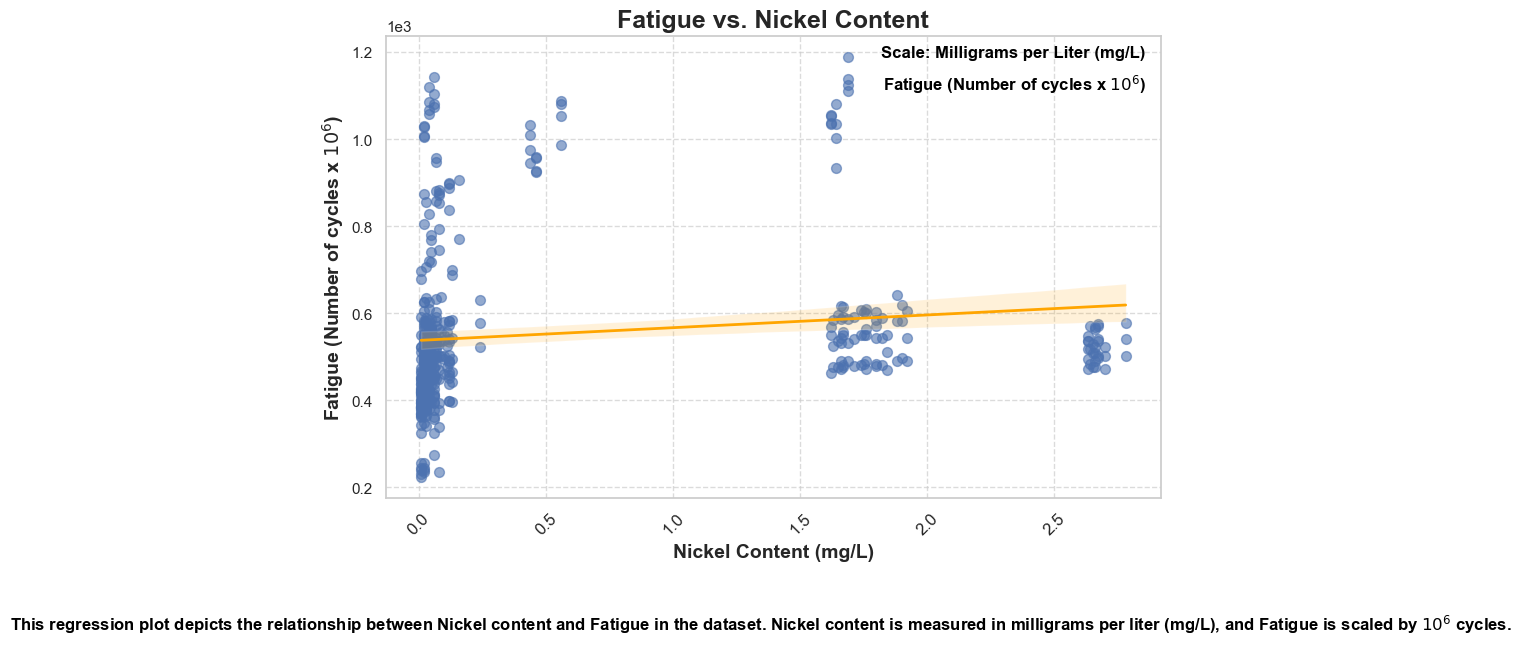

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the regression plot
sns.regplot(data=df, x='Ni', y='Fatigue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'orange', 'linewidth': 2})

# Adding labels and title
plt.title("Fatigue vs. Nickel Content", fontsize=18, weight='bold')
plt.xlabel("Nickel Content (mg/L)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')
plt.text(0.98, 0.92, "Fatigue (Number of cycles x $10^6$)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')

# Using scientific notation for y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.5, -0.1, "This regression plot depicts the relationship between Nickel content and Fatigue in the dataset. Nickel content is measured in milligrams per liter (mg/L), and Fatigue is scaled by $10^6$ cycles.", fontsize=12, ha='center', va='center', color='black', weight='bold')

# Show the plot
plt.show()


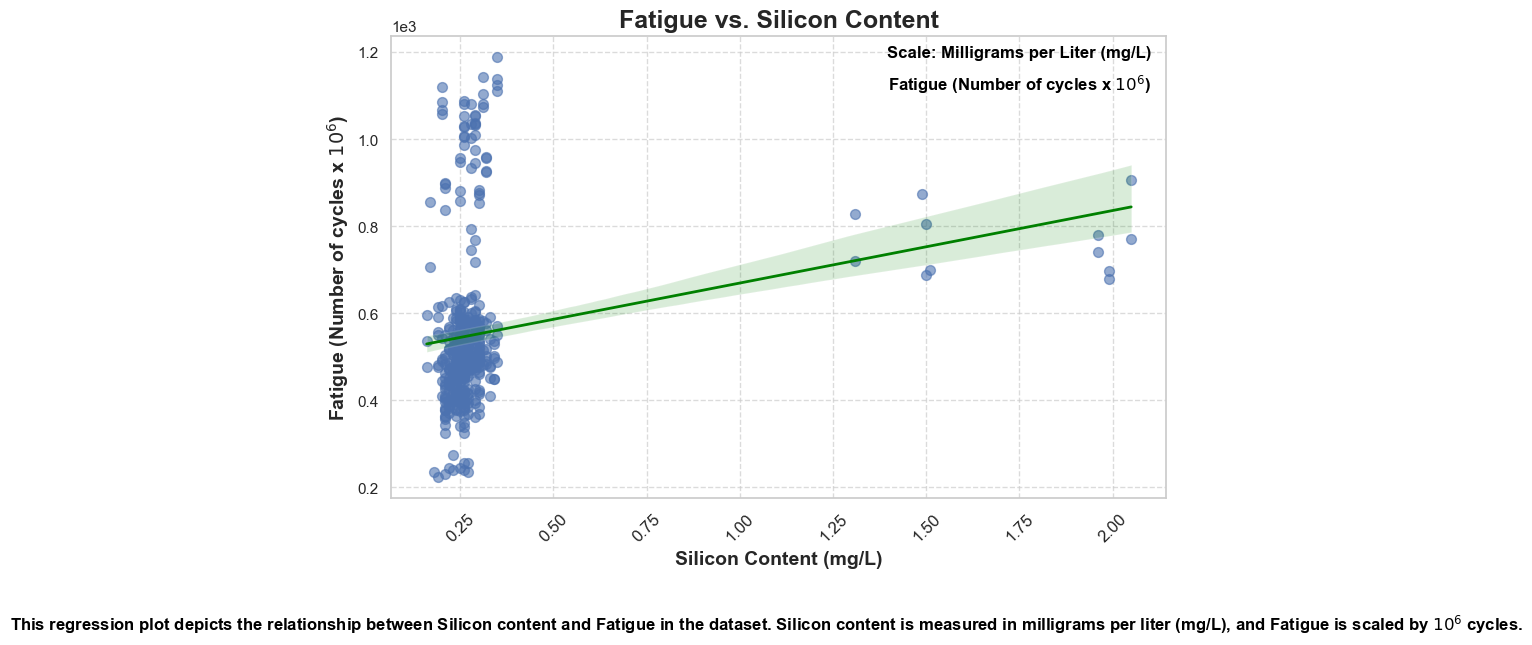

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the regression plot
sns.regplot(data=df, x='Si', y='Fatigue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'green', 'linewidth': 2})

# Adding labels and title
plt.title("Fatigue vs. Silicon Content", fontsize=18, weight='bold')
plt.xlabel("Silicon Content (mg/L)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')
plt.text(0.98, 0.92, "Fatigue (Number of cycles x $10^6$)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')

# Using scientific notation for y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.5, -0.1, "This regression plot depicts the relationship between Silicon content and Fatigue in the dataset. Silicon content is measured in milligrams per liter (mg/L), and Fatigue is scaled by $10^6$ cycles.", fontsize=12, ha='center', va='center', color='black', weight='bold')

# Show the plot
plt.show()


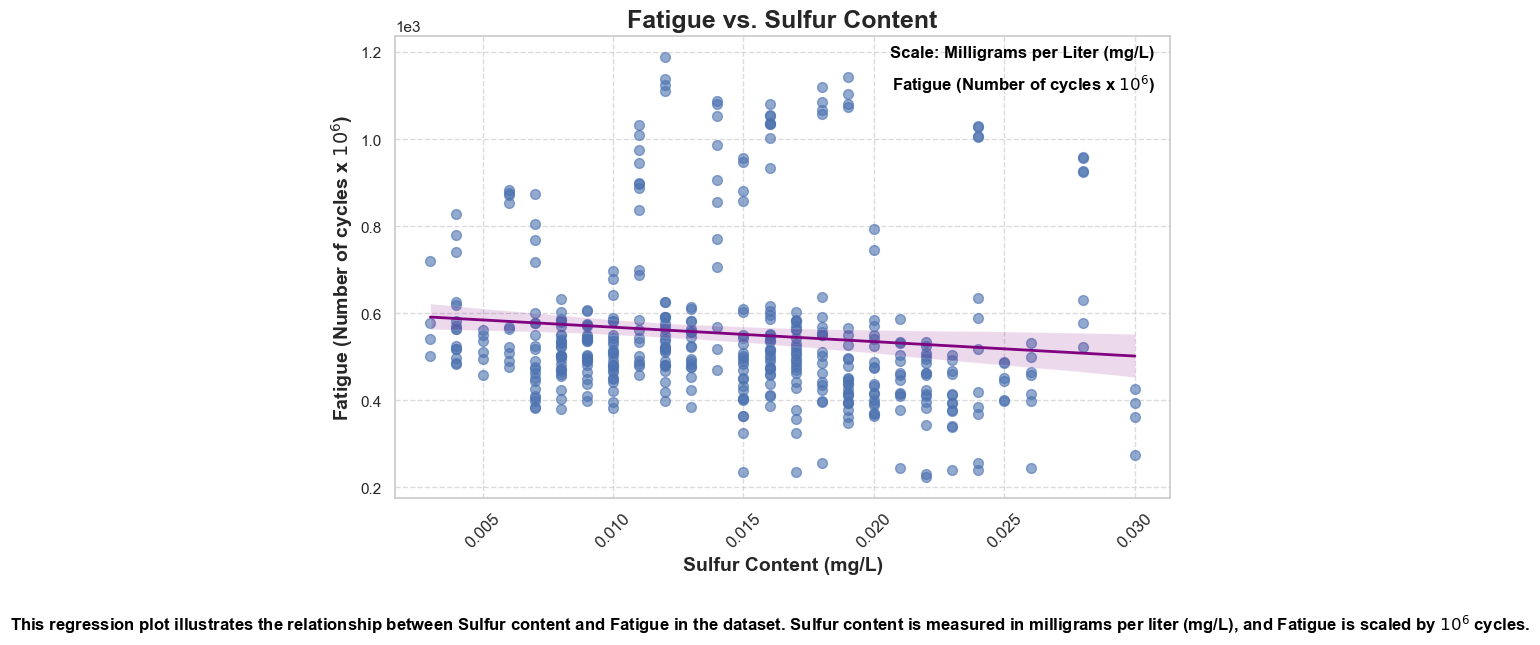

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the regression plot
sns.regplot(data=df, x='S', y='Fatigue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'purple', 'linewidth': 2})

# Adding labels and title
plt.title("Fatigue vs. Sulfur Content", fontsize=18, weight='bold')
plt.xlabel("Sulfur Content (mg/L)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')
plt.text(0.98, 0.92, "Fatigue (Number of cycles x $10^6$)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')

# Using scientific notation for y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.5, -0.1, "This regression plot illustrates the relationship between Sulfur content and Fatigue in the dataset. Sulfur content is measured in milligrams per liter (mg/L), and Fatigue is scaled by $10^6$ cycles.", fontsize=12, ha='center', va='center', color='black', weight='bold')

# Show the plot
plt.show()


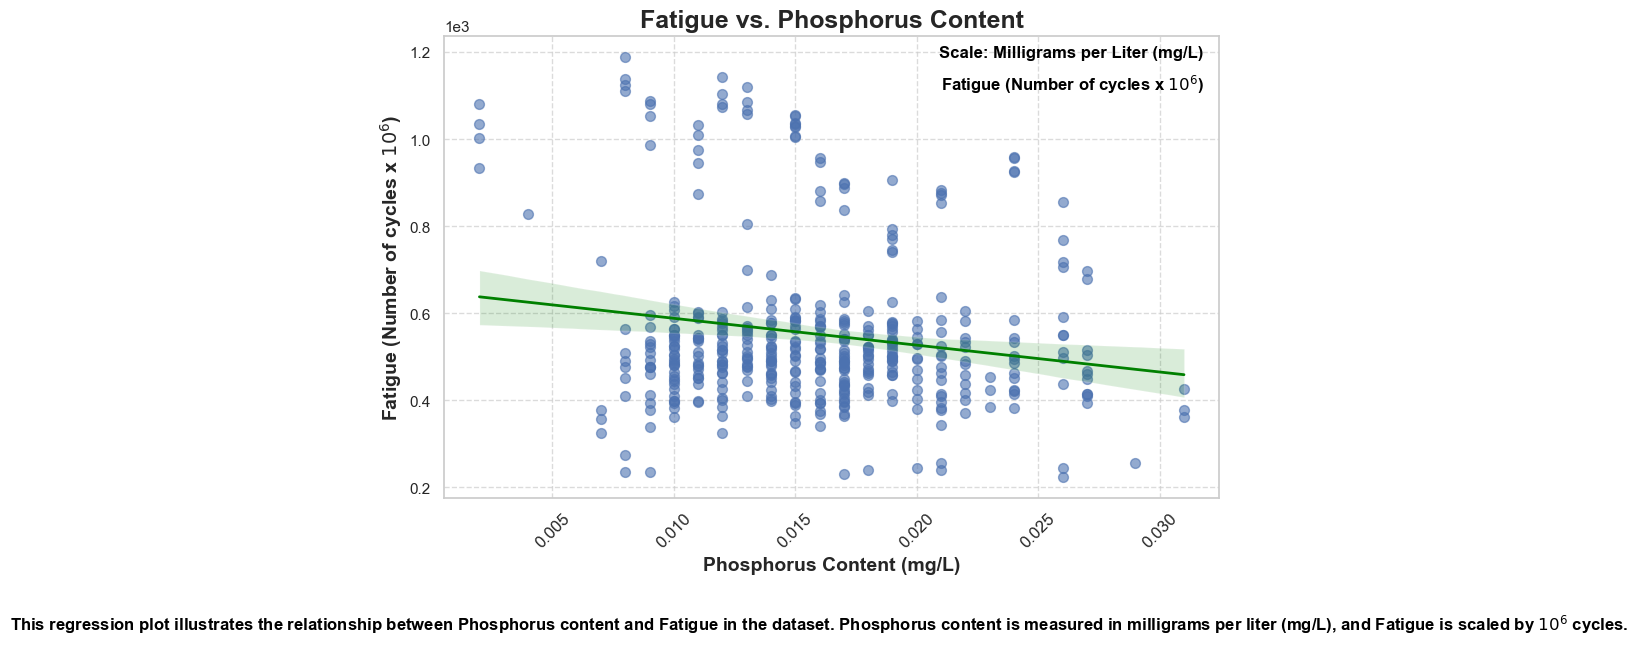

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the regression plot
sns.regplot(data=df, x='P', y='Fatigue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'green', 'linewidth': 2})

# Adding labels and title
plt.title("Fatigue vs. Phosphorus Content", fontsize=18, weight='bold')
plt.xlabel("Phosphorus Content (mg/L)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')
plt.text(0.98, 0.92, "Fatigue (Number of cycles x $10^6$)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')

# Using scientific notation for y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.5, -0.1, "This regression plot illustrates the relationship between Phosphorus content and Fatigue in the dataset. Phosphorus content is measured in milligrams per liter (mg/L), and Fatigue is scaled by $10^6$ cycles.", fontsize=12, ha='center', va='center', color='black', weight='bold')

# Show the plot
plt.show()


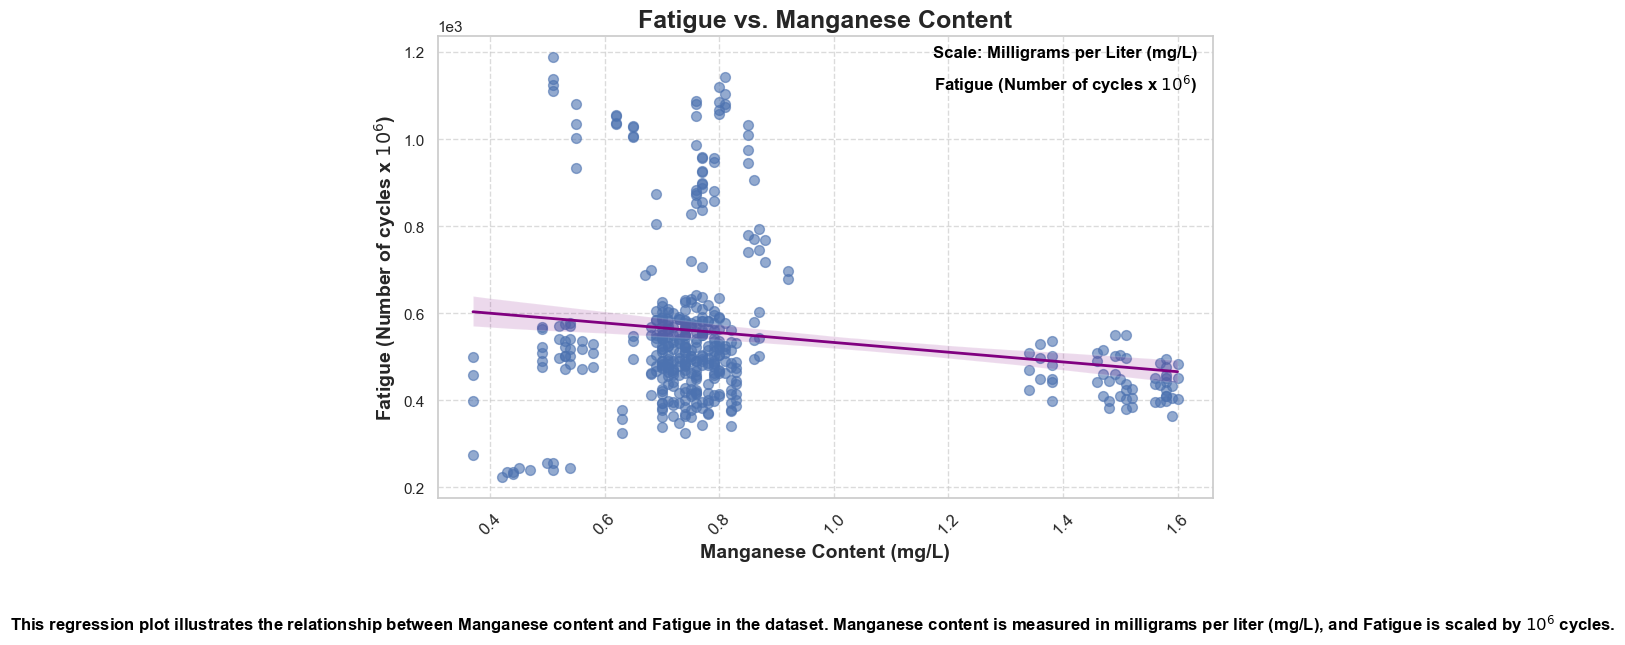

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the regression plot
sns.regplot(data=df, x='Mn', y='Fatigue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'purple', 'linewidth': 2})

# Adding labels and title
plt.title("Fatigue vs. Manganese Content", fontsize=18, weight='bold')
plt.xlabel("Manganese Content (mg/L)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.98, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')
plt.text(0.98, 0.92, "Fatigue (Number of cycles x $10^6$)", transform=ax.transAxes, fontsize=12, ha='right', va='top', color='black', weight='bold')

# Using scientific notation for y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adding a caption below the plot
plt.figtext(0.5, -0.1, "This regression plot illustrates the relationship between Manganese content and Fatigue in the dataset. Manganese content is measured in milligrams per liter (mg/L), and Fatigue is scaled by $10^6$ cycles.", fontsize=12, ha='center', va='center', color='black', weight='bold')

# Show the plot
plt.show()


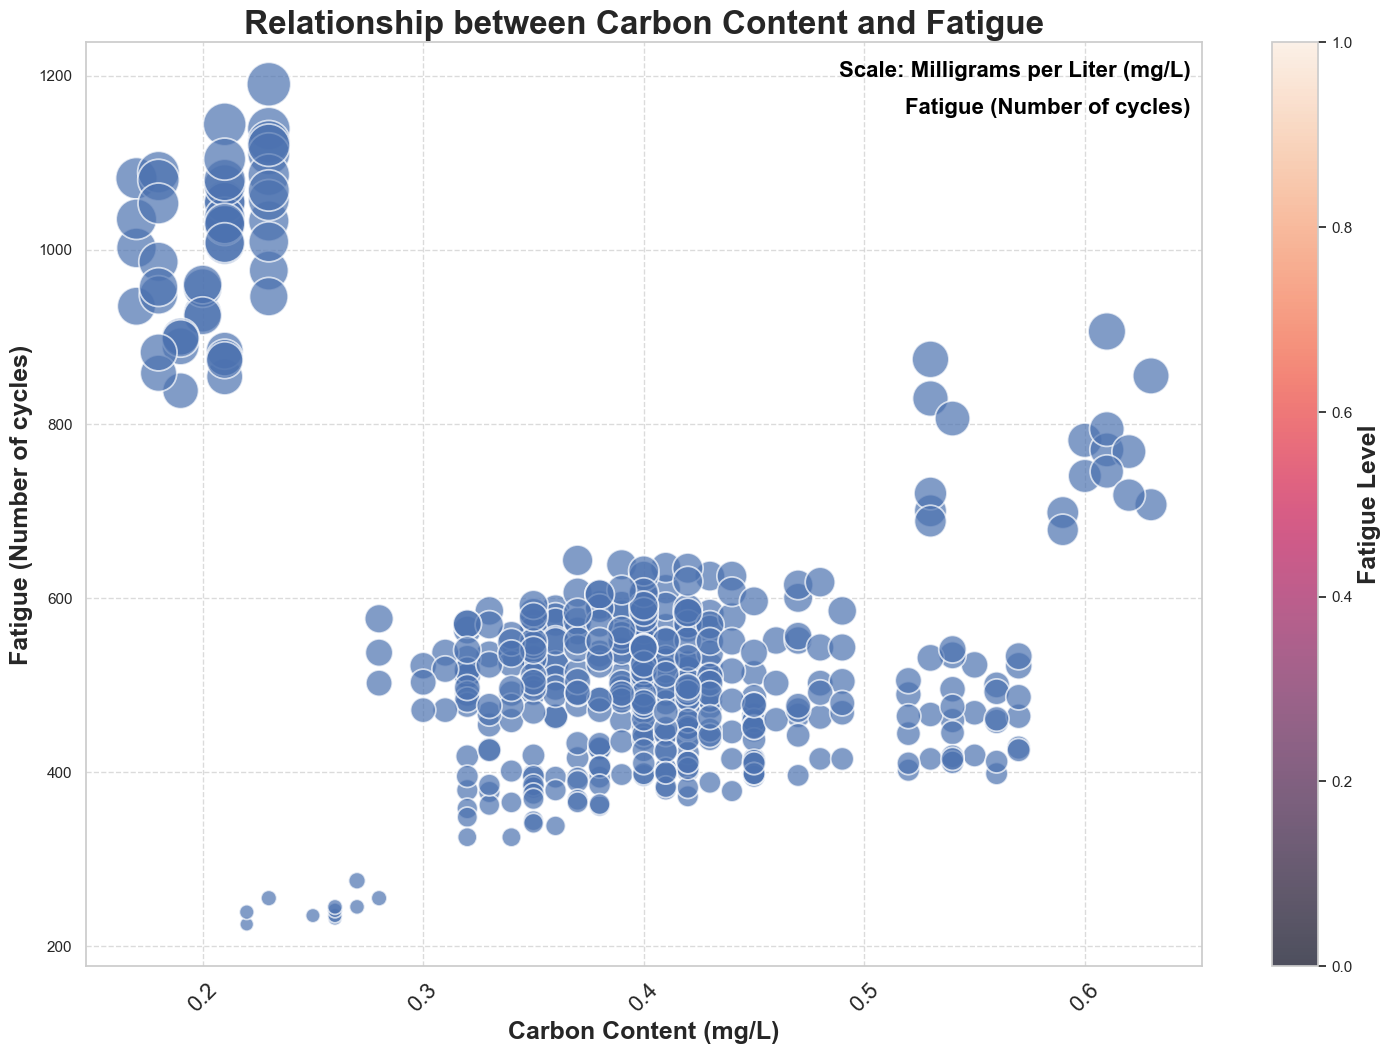

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Assuming 'df' is your DataFrame containing the data
fig, ax = plt.subplots(figsize=(18, 12))  # Increased the figure size

# Plotting the main scatter plot
scatter = sns.scatterplot(data=df, x='C', y='Fatigue', size='Fatigue', sizes=(100, 1000), alpha=0.7)

# Adding labels and title
plt.title("Relationship between Carbon Content and Fatigue", fontsize=24, weight='bold')  # Increased title font size
plt.xlabel("Carbon Content (mg/L)", fontsize=18, weight='bold')  # Increased x-axis label font size
plt.ylabel("Fatigue (Number of cycles)", fontsize=18, weight='bold')  # Increased y-axis label font size

# Adding units, multipliers, and a caption
plt.text(0.99, 0.98, "Scale: Milligrams per Liter (mg/L)", transform=ax.transAxes, fontsize=16, ha='right', va='top', color='black', weight='bold')
plt.text(0.99, 0.94, "Fatigue (Number of cycles)", transform=ax.transAxes, fontsize=16, ha='right', va='top', color='black', weight='bold')

# Describing the x-axis scale
plt.xticks(fontsize=16)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Creating a separate scatter plot for the color representation
color_scatter = sns.scatterplot(data=df, x='C', y='Fatigue', hue='Fatigue', palette='viridis', sizes=(100, 1000), alpha=0)

# Removing the legend for the color representation
color_scatter.legend_.remove()

# Adding a colorbar legend to represent the size of fatigue
cb = plt.colorbar(scatter.collections[0])
cb.set_label('Fatigue Level', fontsize=18, weight='bold')


# Show the plot
plt.show()



This scatter plot depicts the relationship between Carbon content and Fatigue in the dataset. Carbon content is measured in milligrams per liter (mg/L). Each point's size represents the level of fatigue, with larger points indicating higher fatigue levels.

Boxplot of Fatigue by Material Composition:

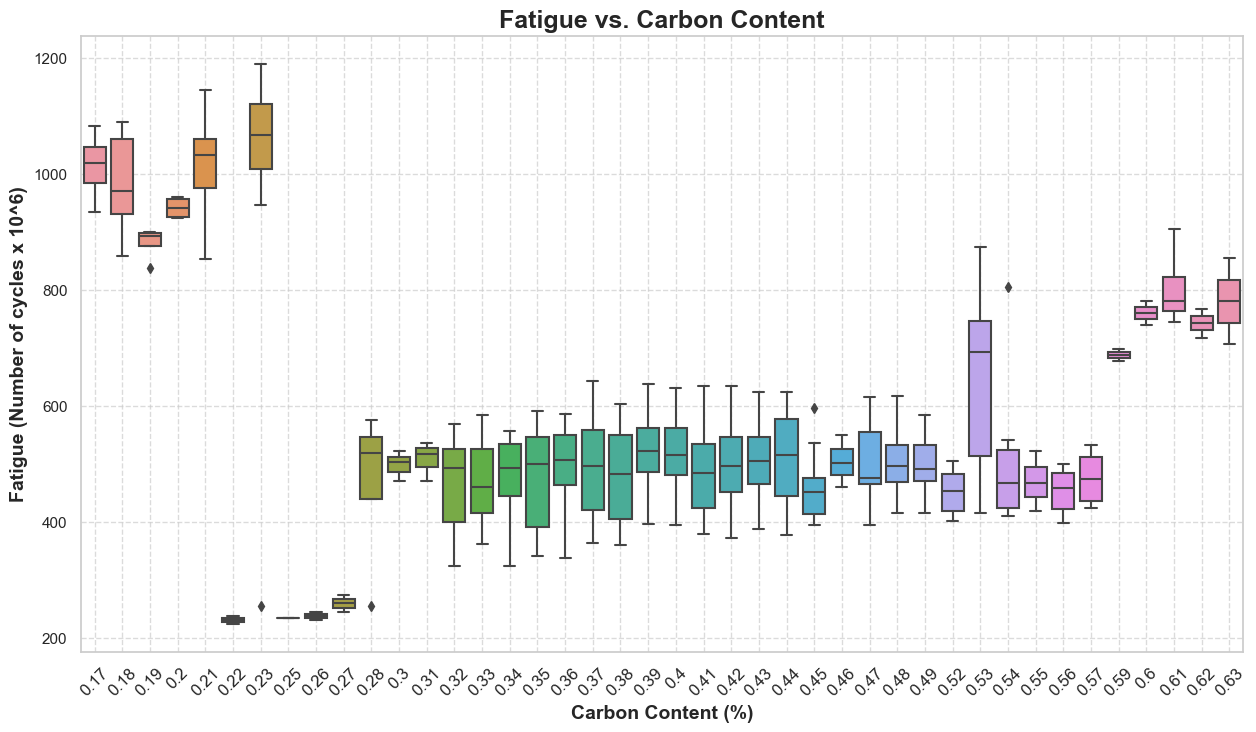

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted the figure size

# Plotting the boxplot
boxplot = sns.boxplot(data=df, x='C', y='Fatigue')

# Adding labels and title
plt.title("Fatigue vs. Carbon Content", fontsize=18, weight='bold')
plt.xlabel("Carbon Content (%)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x 10^6)", fontsize=14, weight='bold')

# Describing the x-axis scale
plt.xticks(fontsize=12)
plt.tick_params(axis='x', rotation=45)

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)



# Show the plot
plt.show()





This boxplot illustrates the distribution of Fatigue across different levels of Carbon content.
Carbon content is measured in percentage (%).
The box represents the interquartile range (IQR),
the line inside the box is the median, and the whiskers extend to the minimum and maximum values within 1.5 times the IQR.

<Figure size 1500x800 with 0 Axes>

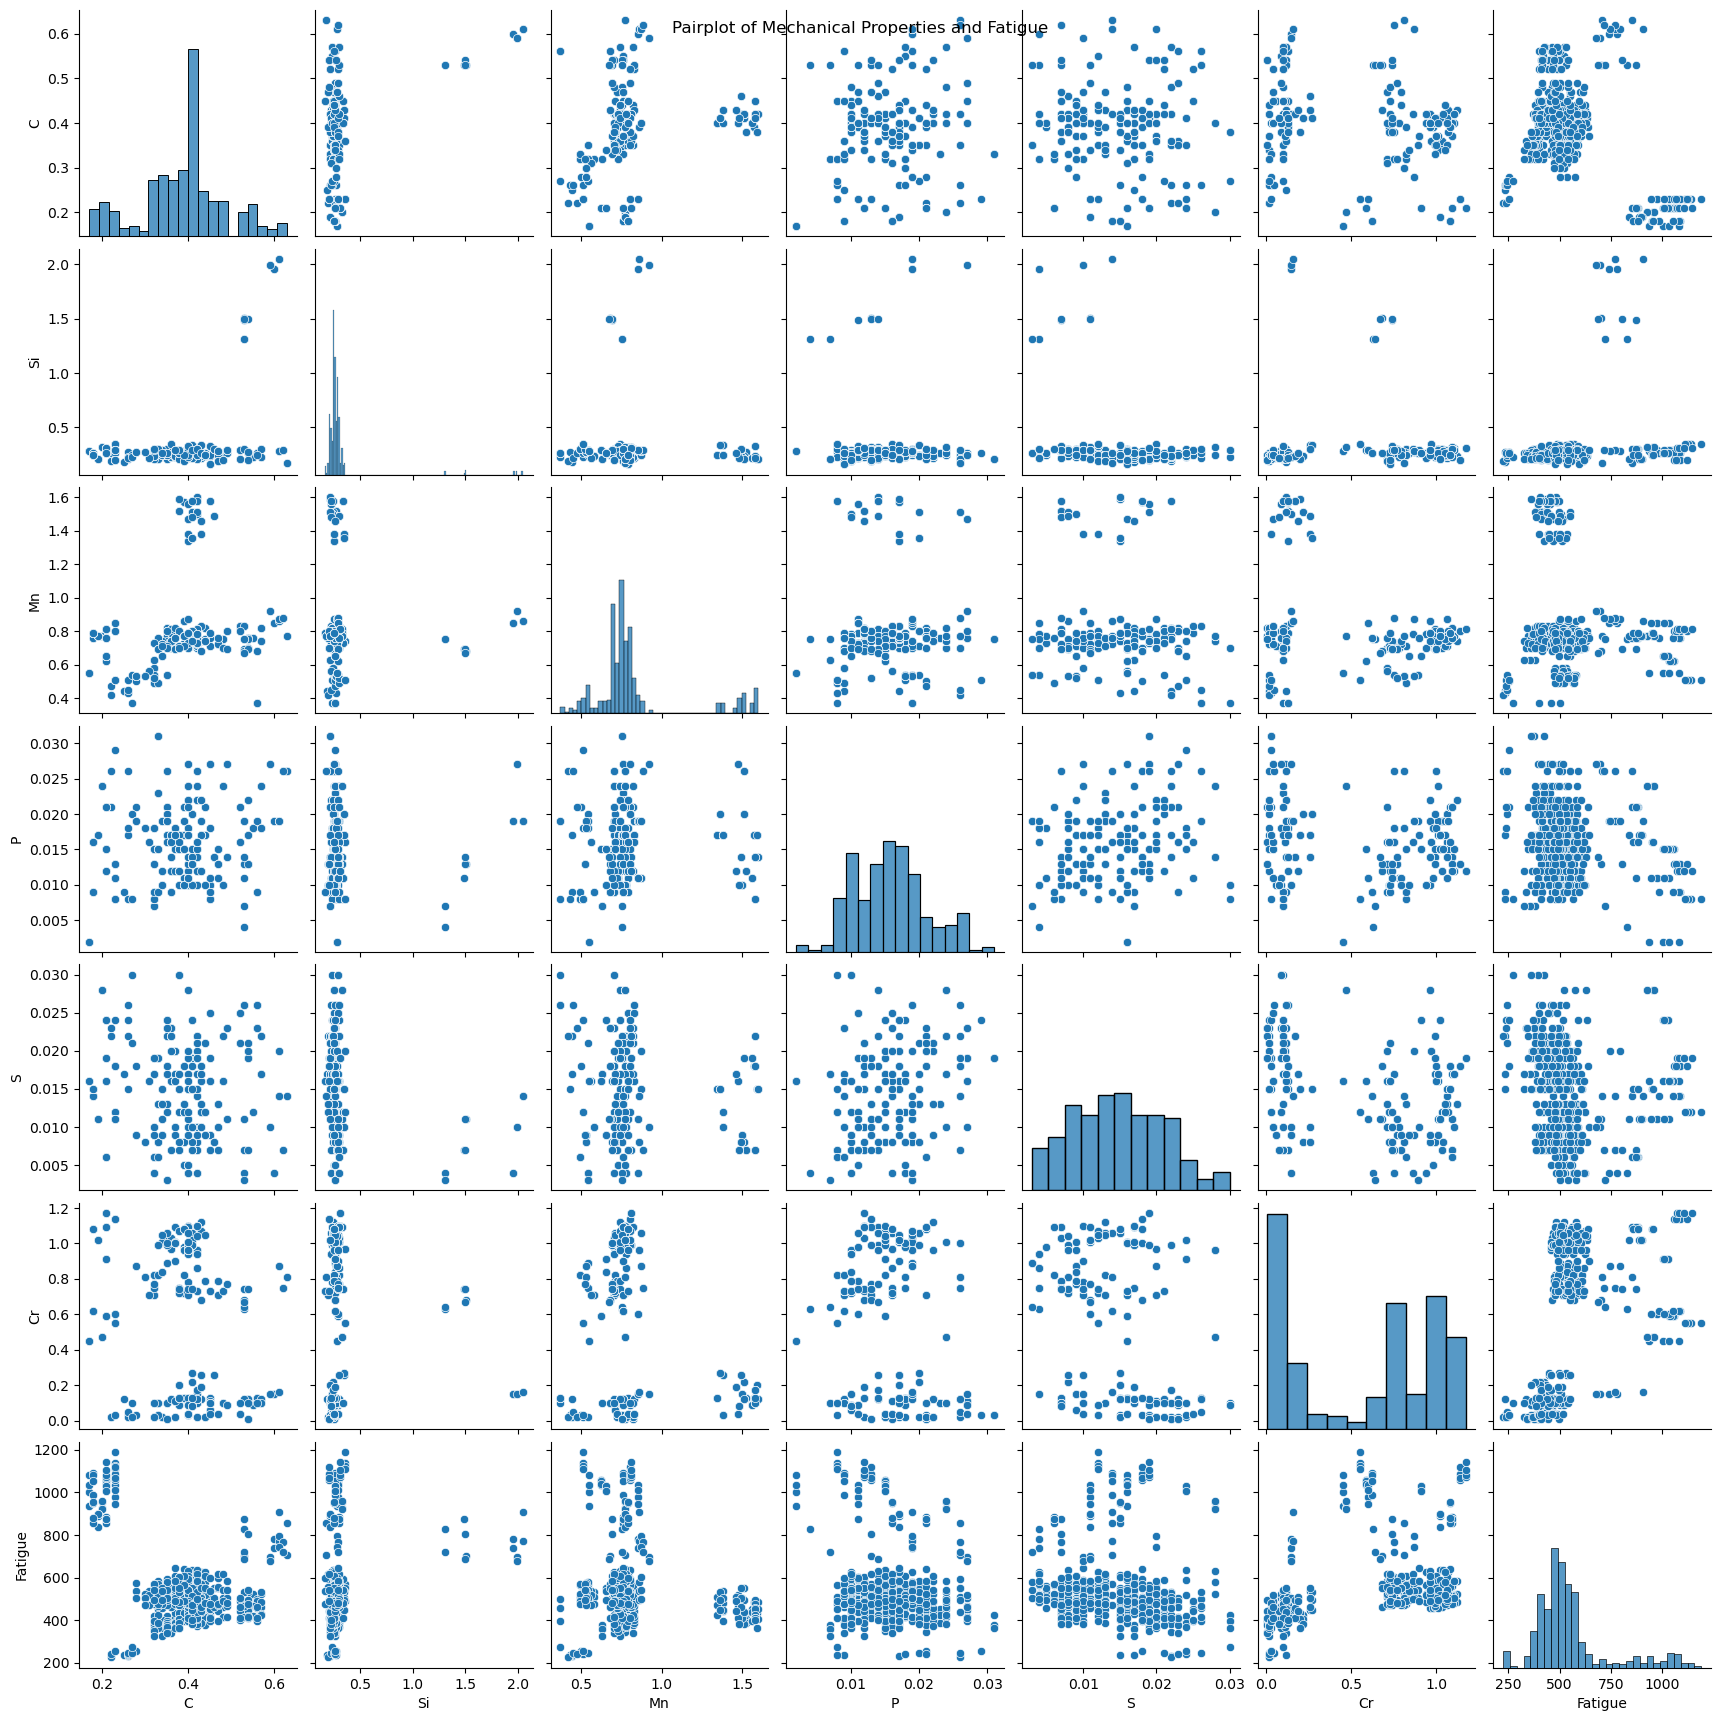

In [22]:
plt.figure(figsize=(15, 8))
sns.pairplot(df[['C', 'Si', 'Mn', 'P', 'S','Cr', 'Fatigue']])
plt.suptitle("Pairplot of Mechanical Properties and Fatigue")
plt.show()

Scatter Plot of Fatigue vs. Heat Treatment Temperatures:

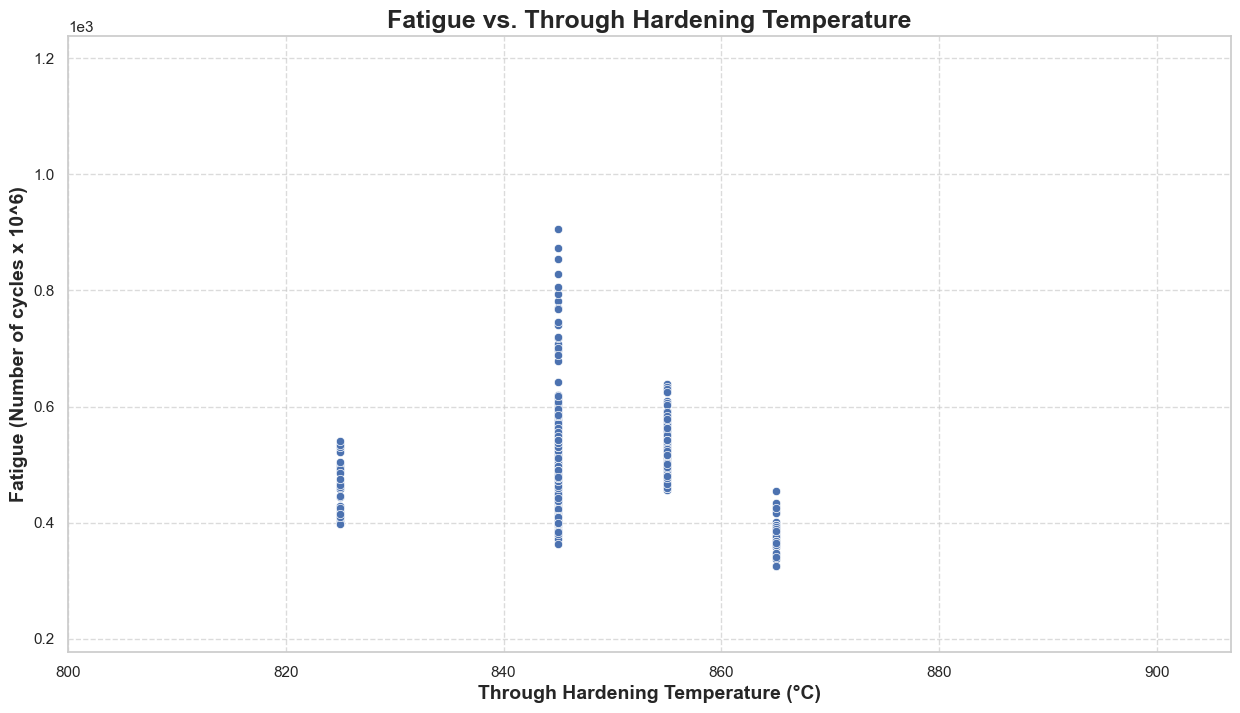

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger figure
plt.figure(figsize=(15, 8))

# Plot the scatterplot
scatterplot = sns.scatterplot(data=df, x='THT', y='Fatigue')

# Set the lower limit for the x-axis
plt.xlim(800,)

# Add labels and title
plt.title("Fatigue vs. Through Hardening Temperature", fontsize=18, weight='bold')
plt.xlabel("Through Hardening Temperature (°C)", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x 10^6)", fontsize=14, weight='bold')

# Use scientific notation for the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This scatterplot visualizes the relationship between Fatigue and Through Hardening Temperature.
Through Hardening Temperature is measured in degrees Celsius (°C).
The y-axis represents Fatigue, scaled by a factor of 10^6 for better readability.

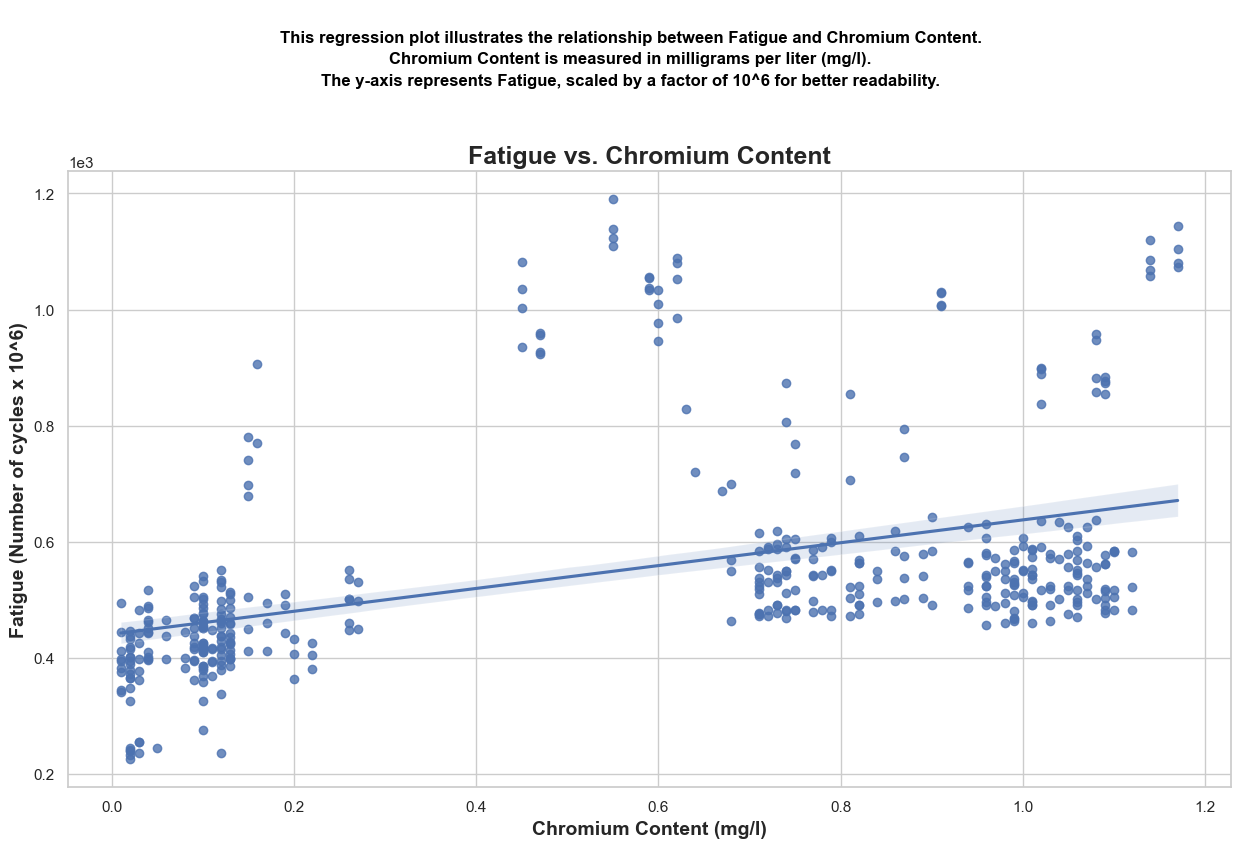

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(15, 8))

# Plot the regression plot
regplot = sns.regplot(data=df, x='Cr', y='Fatigue')

# Add labels and title
plt.title("Fatigue vs. Chromium Content", fontsize=18, weight='bold')
plt.xlabel("Chromium Content", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x 10^6)", fontsize=14, weight='bold')

# Use scientific notation for the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set x-axis label to correct unit
plt.xlabel("Chromium Content (mg/l)")

# Add a caption above the plot
caption_text = """
This regression plot illustrates the relationship between Fatigue and Chromium Content.
Chromium Content is measured in milligrams per liter (mg/l).
The y-axis represents Fatigue, scaled by a factor of 10^6 for better readability.
"""
plt.figtext(0.5, 1.02, caption_text, fontsize=12, ha='center', va='center', color='black', weight='bold', linespacing=1.5)

# Show the plot
plt.show()

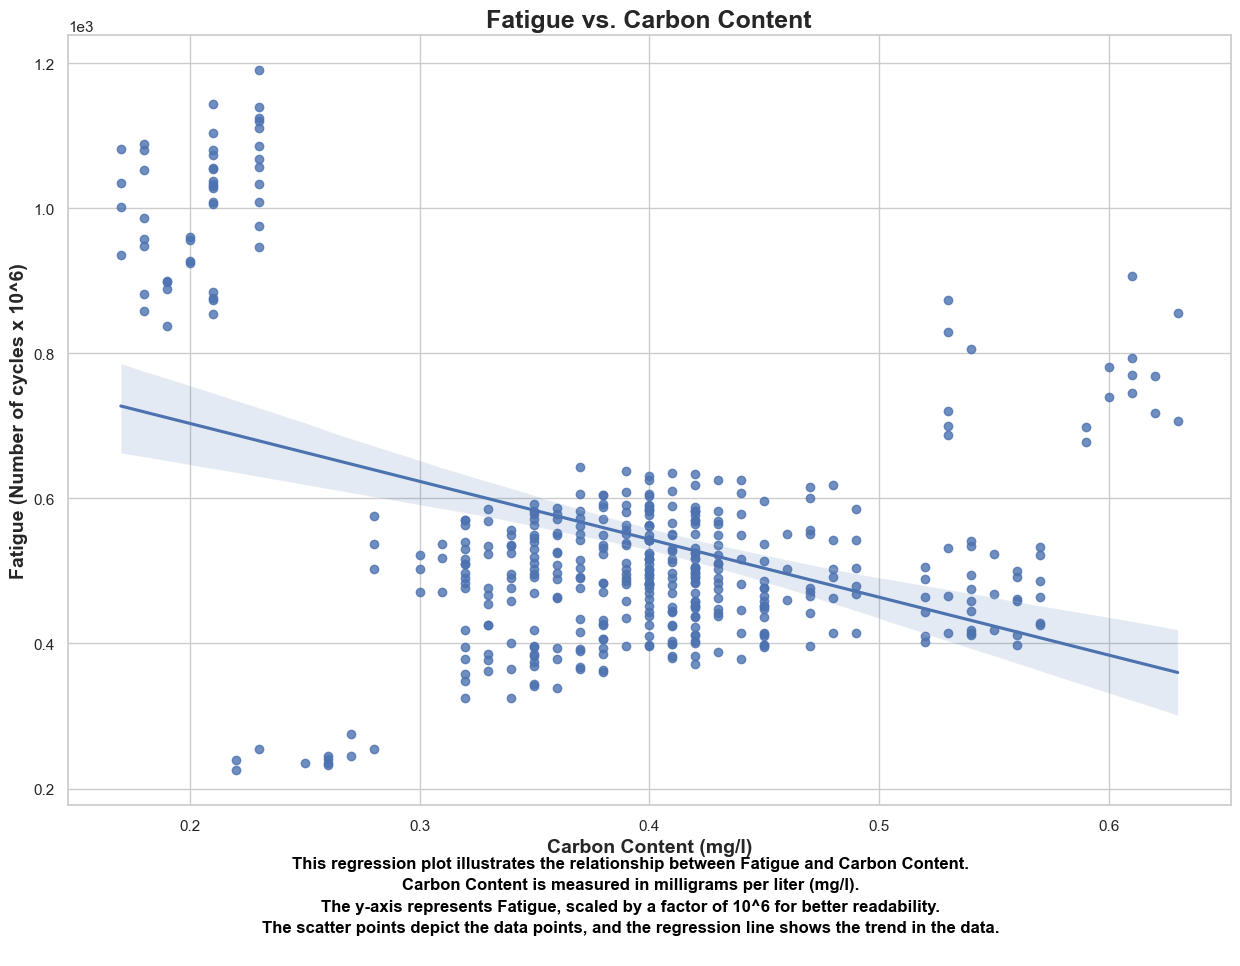

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(15, 10))

# Plot the regression plot
regplot = sns.regplot(data=df, x='C', y='Fatigue')

# Add labels and title
plt.title("Fatigue vs. Carbon Content", fontsize=18, weight='bold')
plt.xlabel("Carbon Content", fontsize=14, weight='bold')
plt.ylabel("Fatigue (Number of cycles x 10^6)", fontsize=14, weight='bold')

# Use scientific notation for the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set x-axis label to correct unit
plt.xlabel("Carbon Content (mg/l)")

# Add a multi-line caption below the plot
caption_text = """
This regression plot illustrates the relationship between Fatigue and Carbon Content.
Carbon Content is measured in milligrams per liter (mg/l).
The y-axis represents Fatigue, scaled by a factor of 10^6 for better readability.
The scatter points depict the data points, and the regression line shows the trend in the data.
"""
plt.figtext(0.5, 0.02, caption_text, fontsize=12, ha='center', va='center', color='black', weight='bold', linespacing=1.5)

# Show the plot
plt.show()



### Modeling

Exploring a range of models to tackle our problem:

1. **Linear Regression**: A straightforward and interpretable choice for your initial analysis.

2. **K-Nearest Neighbors (KNN)**: A non-parametric approach for pattern recognition and classification.

3. **Gradient Boosting Method (GBM)**: A powerful ensemble learning method to enhance predictive accuracy.

4. **XGBoost**: A popular gradient boosting framework known for its efficiency and performance.

5. **CatBoost**: A gradient boosting library optimized for handling categorical features effectively.

6. **LightGBM**: LightGBM is a gradient-boosting framework based on decision trees to increase the efficiency of the model and reduces memory usage. 


Cross Validation will be applied to every model 

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['Fatigue'],axis=1)
y = df['Fatigue']

### Linear Regression 

In [61]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 101)
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

In [62]:
#R^2 Score with Cross Validation
cross_val_score1=cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2',).mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.9616129385598822
Verified R2 value for Testing Model: 0.9133125562040021


In [63]:
#Rmse Score Value with Cross Validation 
train_crs_val = np.sqrt(-cross_val_score(lr_model,X_train,y_train,cv = 10,scoring = "neg_mean_squared_error")).mean()

test_crs_val = np.sqrt(-cross_val_score(lr_model,X_test,y_test,cv = 10,scoring = "neg_mean_squared_error")).mean()

print("train cross val rmse:{}\ntest cross val rmse:{}".format(train_crs_val,test_crs_val))

train cross val rmse:33.92064569658361
test cross val rmse:38.82853476963811


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\1217779508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color="b", label="Actual Fatigue", shade=True)


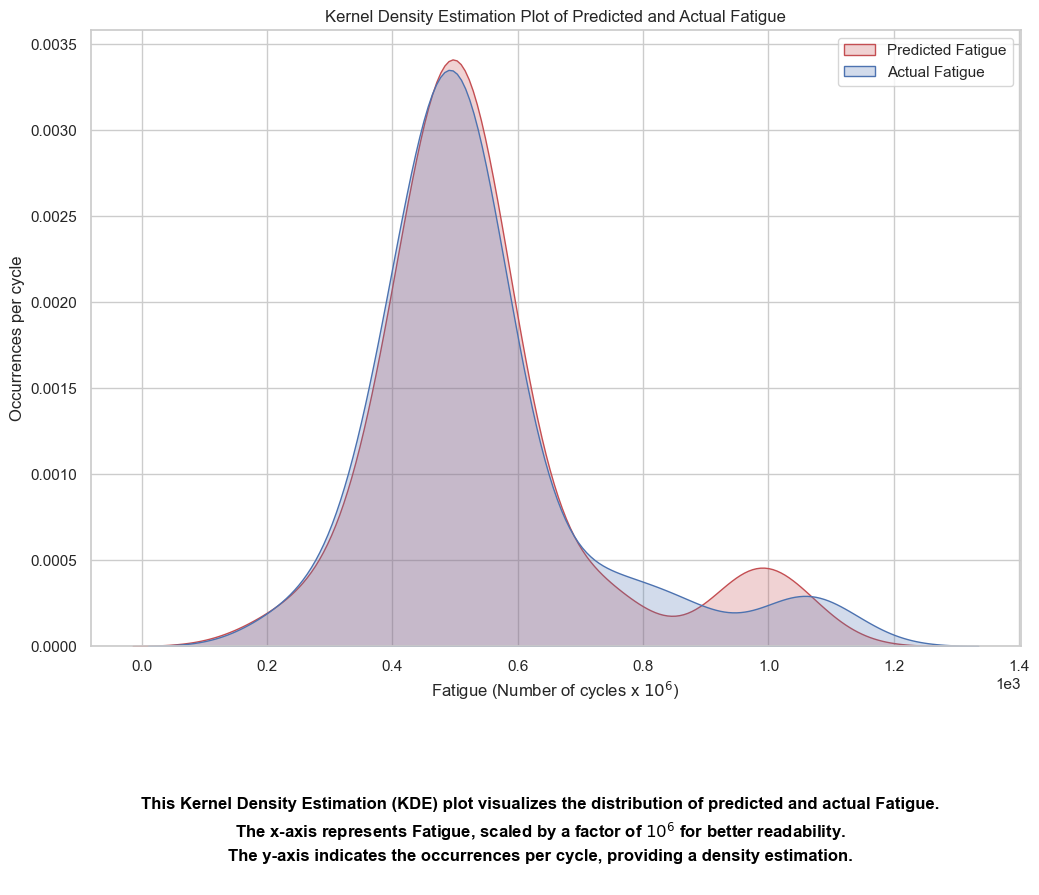

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(12, 8))

# Create a kernel density estimation plot for predicted and actual fatigue
sns.kdeplot(lr_model.predict(X_test), color="r", label="Predicted Fatigue", fill=True)
sns.kdeplot(y_test, color="b", label="Actual Fatigue", shade=True)

# Adding labels and title
plt.xlabel("Fatigue (Number of cycles x $10^6$)")  # Assuming the multiplier for Fatigue is 10^6
plt.ylabel("Occurrences per cycle")  # Describing the unit for density
plt.title("Kernel Density Estimation Plot of Predicted and Actual Fatigue")

# Adding a legend for clarity
plt.legend()

# Scientific notation for x-axis
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# Adding a caption below the plot
caption_text = """
This Kernel Density Estimation (KDE) plot visualizes the distribution of predicted and actual Fatigue.
The x-axis represents Fatigue, scaled by a factor of $10^6$ for better readability.
The y-axis indicates the occurrences per cycle, providing a density estimation.
"""
plt.figtext(0.5, -0.12, caption_text, fontsize=12, ha='center', va='center', color='black', weight='bold', linespacing=1.5)

# Save the plot as an image file (adjust the file extension as needed, e.g., .png, .jpg)
plt.savefig('density_plot.png')

# Show the plot if needed
plt.show()


In [65]:
d = {'R^2 Score ': [0.91], 'Rmse Score': [0.38]}
lr_data = pd.DataFrame(data=d)
lr_data

,R^2 Score,Rmse Score
0,0.91,0.38


**Considerations:**

1. **Overfitting Risk**: The significant gap between R^2 values for training and testing sets suggests potential overfitting, which can hinder generalization.

2. **Generalization Challenge**: The drop in R^2 from training to testing data highlights a challenge in achieving good performance on new, unseen data.


In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
warnings.filterwarnings("ignore")

# Create an Elastic Net model
elastic_net_model = ElasticNet()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Create an Elastic Net model with the best hyperparameters
best_elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Fit the best model to the training data
best_elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_elastic_net_model.predict(X_train)
y_pred_test = best_elastic_net_model.predict(X_test)

# Calculate RMSE for both training and testing data
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Best Alpha:", best_alpha)
print("Best L1 Ratio:", best_l1_ratio)
print("RMSE for Training Data:", rmse_train)
print("RMSE for Testing Data:", rmse_test)

# Calculate R^2 using cross-validation with the best hyperparameters
# Calculate R^2 using cross-validation for the testing set
r2_scores_test = cross_val_score(best_elastic_net_model, X_test, y_test, cv=10, scoring='r2').mean()
print("Cross-Validated R^2 Scores for Testing Set:", r2_scores_test)

Best Alpha: 0.01
Best L1 Ratio: 0.9
RMSE for Training Data: 33.18260437012938
RMSE for Testing Data: 38.267336760095596
Cross-Validated R^2 Scores for Testing Set: 0.9112201012085311


**Considerations:**

1. **Overfitting with Elastic Net:** The lack of significant improvement in R^2 and the persistently high RMSE for the testing set indicate that the Elastic Net model may still be overfitting the data, potentially due to its complexity.

**Exploring Alternative Models:**

1. **K-Nearest Neighbors (KNN):** KNN can capture non-linear relationships, making it a robust choice when dealing with complex data relationships.

2. **Ensemble Methods (e.g., GBM and XGBoost):** Ensemble methods are known for their ability to handle complex relationships and outliers effectively. They can be valuable when linear models fall short.

3. **Hyperparameter Tuning:** Thoroughly search for the best hyperparameters for the models we explore, as optimizing hyperparameters can significantly impact model performance.


### KNN
K nearest neighbors <br>
Scaling the data first before using KNN (This step is mandatory for KNN models to perform)

In [74]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming X_train and y_train are your training data

# Model Tuning
k = {'n_neighbors': np.arange(1, 50)}  # Expanded range and larger steps

knn_model = KNeighborsRegressor()

cv_model = GridSearchCV(knn_model, k, cv=10)

cv_model.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [76]:
# Know the Best params
cv_model.best_params_

{'n_neighbors': 1}

☝️ This can cause Overfitting 🥲

In [77]:
knn_model_tuned = KNeighborsRegressor(n_neighbors = cv_model.best_params_["n_neighbors"])
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [78]:
print("R^2 values:{}".format(knn_model_tuned.score(X_test, y_test)))
y_pred = knn_model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

R^2 values:0.8728444706010132
rmse: 62.13283058386795


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\2162898257.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predicted Values")
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\2162898257.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

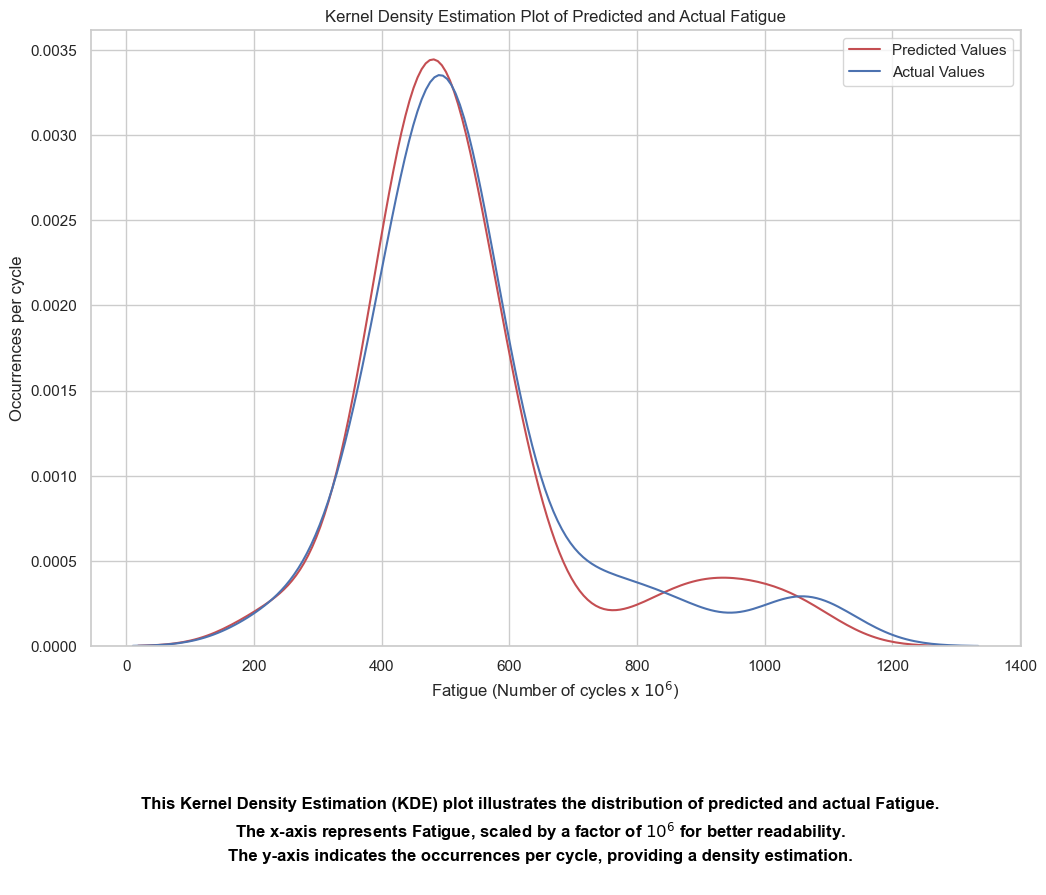

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'knn_model_tuned' is your tuned KNN model and X_test contains test data
plt.figure(figsize=(12, 8))

# Create a kernel density estimation plot for predicted and actual fatigue
ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax1)

# Adding labels and title
plt.xlabel("Fatigue (Number of cycles x $10^6$)")  # Assuming the multiplier for Fatigue is 10^6
plt.ylabel("Occurrences per cycle")  # Describing the unit for density
plt.title("Kernel Density Estimation Plot of Predicted and Actual Fatigue")

# Adding a legend for clarity
plt.legend()

# Adding a caption below the plot
caption_text = """
This Kernel Density Estimation (KDE) plot illustrates the distribution of predicted and actual Fatigue.
The x-axis represents Fatigue, scaled by a factor of $10^6$ for better readability.
The y-axis indicates the occurrences per cycle, providing a density estimation.
"""
plt.figtext(0.5, -0.12, caption_text, fontsize=12, ha='center', va='center', color='black', weight='bold', linespacing=1.5)

# Save the plot as an image file (adjust the file extension as needed, e.g., .png, .jpg)
plt.savefig('your_plot.png')

# Show the plot if needed
plt.show()


In [80]:
d = {'R^2 Score ': [0.87], 'Rmse Score': [.62]}
knn_data = pd.DataFrame(data=d)
knn_data

,R^2 Score,Rmse Score
0,0.87,0.62


**Considerations:**

- With `n_neighbors = 1`, our KNN model is likely overfitting the training data (Very Low Bias), leading to high model variance.
- The model may not generalize well to new, unseen data because it's overly sensitive to noise and fluctuations in the training data.


### Now Using Ensemble Methods (Specifically Boosting)

**Why Boosting (Ensemble Methods)?**

After observing suboptimal model performance with initial linear,regularized and KNN models, we turn to ensemble methods like Boosting to address the following:

**1. Complex Relationships:** Linear models may struggle to capture intricate, non-linear patterns present in the data.

**2. Overfitting:** We aim to mitigate overfitting by combining the predictive power of multiple base models, enhancing robustness to noise in the dataset.

Boosting iteratively corrects model errors and focuses on challenging data points, making it a promising solution to improve predictive accuracy while addressing complex relationships and overfitting.


### Gradient Boosting Method

**Gradient Boosting (GBM):** A machine learning ensemble technique that sequentially combines predictions from multiple base models, such as decision trees, using a learning rate (alpha) to optimize predictive accuracy. It updates predictions by fitting each base model to the negative gradient of the loss function and scales their contributions by alpha, gradually improving the ensemble's performance. The choice of alpha is a hyperparameter that balances learning speed and overfitting. <br>
**Final Prediction:** F(x) = α₀ * h₀(x) + α₁ * h₁(x) + α₂ * h₂(x) + ... + αₙ * hₙ(x)<br>
- **F(x)** represents the final prediction for the input data point x.
- **α0,α1,α2, ..., αn** are the learning rates for each base model (decision tree).
- **h0(x), h1(x), h2(x), ..., hn(x)** are the predictions of each base model (decision tree) for the input data point x.




- Overfitting challenges observed with traditional linear regression, regularization, and K-nearest neighbors (KNN) led us to seek a more robust modeling approach.
- Gradient Boosting (GBM) was chosen for its sequential combination of base models, primarily decision trees, using learning rates to optimize predictive accuracy, thereby mitigating overfitting and capturing complex data patterns.
- The transition to GBM aims to address overfitting issues and leverage the strengths of ensemble methods to enhance predictive accuracy in our research project.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for GridSearchCV
gbm_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

# Get the best model
best_gbm_model = grid_search.best_estimator_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [ ]:
# Create a DataFrame to hold feature importance scores
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_ * 100},index = X_train.columns)

# Sort the features by their importance in ascending order
# This is important so that the most important features are at the top of the plot
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b")

# Set labels for the x-axis
plt.xlabel("Variable Significance Levels")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gbm_tuned' is your tuned Gradient Boosting Machine model and X_test contains test data

plt.figure(figsize=(10, 6))
ax1 = sns.distplot(gbm_tuned.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax1)
plt.xlabel("Fatigue (x 10^6 cycles)")  # Assuming the multiplier for Fatigue is 10^6
plt.ylabel("Occurrences per cycle")  # Describing the unit for density
plt.title("Kernel Density Estimation Plot of Fatigue")
plt.legend()

# Save the plot as an image file (adjust the file extension as needed, e.g., .png, .jpg)
plt.savefig('your_plot.png')

# Show the plot if needed
plt.show()

In [91]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.23]}
gbm_data = pd.DataFrame(data=d)
gbm_data

,R^2 Score,Rmse Score
0,0.98,0.23


**Considerations and Next Steps**

1. **Reduced Overfitting:** The Gradient Boosting Machine (GBM) model has significantly reduced overfitting compared to previous models. It achieves an R-squared value of 0.98 and an RMSE of 23.24. This indicates a better balance between model complexity and generalization to new data.

2. **Improved Predictive Power:** GBM's high R-squared value demonstrates its improved predictive power. It captures complex relationships within the data, leading to more accurate fatigue predictions.

3. **Exploring Advanced Methods:** While GBM is performing admirably, it's essential to explore even more advanced methods such as XGboost and CatBoost. These methods are specifically designed for boosting performance and handling large datasets efficiently. They might provide further enhancements in predictive accuracy.

In summary, the GBM model outperforms earlier models by mitigating overfitting and enhancing predictive power. However, to push the predictive performance even further and optimize computational efficiency, we will investigate advanced methods like XgBoost and CatBoost in the next steps.


### XGboost

[XGBoost](https://xgboost.ai/), known as Extreme Gradient Boosting, is a highly versatile and powerful machine learning algorithm designed for outstanding predictive performance. It's proficient in both regression and classification tasks, making it a versatile choice for data scientists. Here's a comprehensive understanding of XGBoost:

### How XGBoost Works

XGBoost constructs predictive models by creating an ensemble of decision trees. These trees are sequentially built, with each one aimed at rectifying errors made by its predecessors. This approach significantly enhances model performance.

### Key Concepts

Let's delve into important concepts that define XGBoost:

- **Similarity Scores:** To determine the best feature splits for decision trees, XGBoost calculates similarity scores. These scores gauge how effectively a split improves the overall model. The formula for similarity scores can be defined as:

    $Similarity Score = \frac{Residuals^2}{Cover + \lambda}$

  Here, Gain is the quality measure of a feature split, Cover represents the number of observations for a given feature, and λ is the regularization term.

- **Gain:** Gain evaluates the quality of a feature split by measuring the reduction in the loss function. It's determined as the difference between the loss before and after the split, often represented as:

    $Gain = Left_{\text{Similarity Score}} + Right_{\text{Similarity Score}} - Root_{\text{Similarity Score}}$

- **Gain - (gamma):** XGBoost introduces regularization through the gamma parameter. This regularization method aids in pruning, preventing overfitting by setting a threshold. Splits with a gain lower than gamma are pruned, leading to more robust models.

- **Cover:** The Cover concept is associated with the number of observations relative to a particular feature. It plays a role in the computation of similarity scores and can be represented as:

    $Cover = \sum \text{number of observations for the feature}$

XGBoost's optimization and regularization techniques, along with these vital concepts, make it a top choice in data science for both competitive challenges and real-world applications.

### Why XGBoost?

1. **Enhanced Predictive Accuracy:** The intricate relationships and complexities within our dataset require a robust and powerful model. XGBoost, known for its exceptional predictive power, excels in capturing nuanced patterns and delivering precise predictions. This is essential for accurate fatigue prediction, where subtle variables play a significant role.

2. **Effective Handling of Non-Linear Relationships:** Previous models, including linear regression and KNN, struggled to capture the non-linear relationships present in our dataset. XGBoost's ensemble of decision trees is tailored to handle such complexities, making it a natural choice to model the intricate interplay of various factors affecting fatigue.

3. **Robustness and Generalization:** XGBoost's ability to reduce overfitting, especially when compared to linear models and its sequential construction of decision trees, results in a model that's more robust and capable of generalizing well to unseen data. This is crucial for real-world applications, ensuring that our fatigue prediction model performs reliably.

By embracing XGBoost, we aim to tackle the complexities of our fatigue prediction task head-on and provide the most accurate and robust results to address our specific challenges.


In [81]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_xgb_model.predict(X_test)

# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = best_xgb_model.score(X_test, y_test)

print("Best Parameters: ", grid_search.best_params_)
print("RMSE: ", rmse)
print("R^2 Score: ", r2)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
RMSE:  22.64478746497622
R^2 Score:  0.983110006991932


Text(0.5, 0, 'Variable Significance Levels')

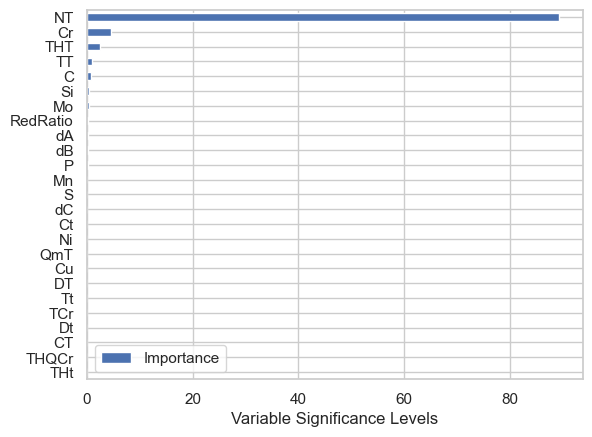

In [82]:
# Create a DataFrame to hold feature importance scores
Importance = pd.DataFrame({"Importance": best_xgb_model.feature_importances_ * 100},index = X_train.columns)

# Sort the features by their importance in ascending order
# This is important so that the most important features are at the top of the plot
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b")

# Set labels for the x-axis
plt.xlabel("Variable Significance Levels")


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\3233928449.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(best_xgb_model.predict(X_test), hist=False, color="r", label="Predicted Values")
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\3233928449.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

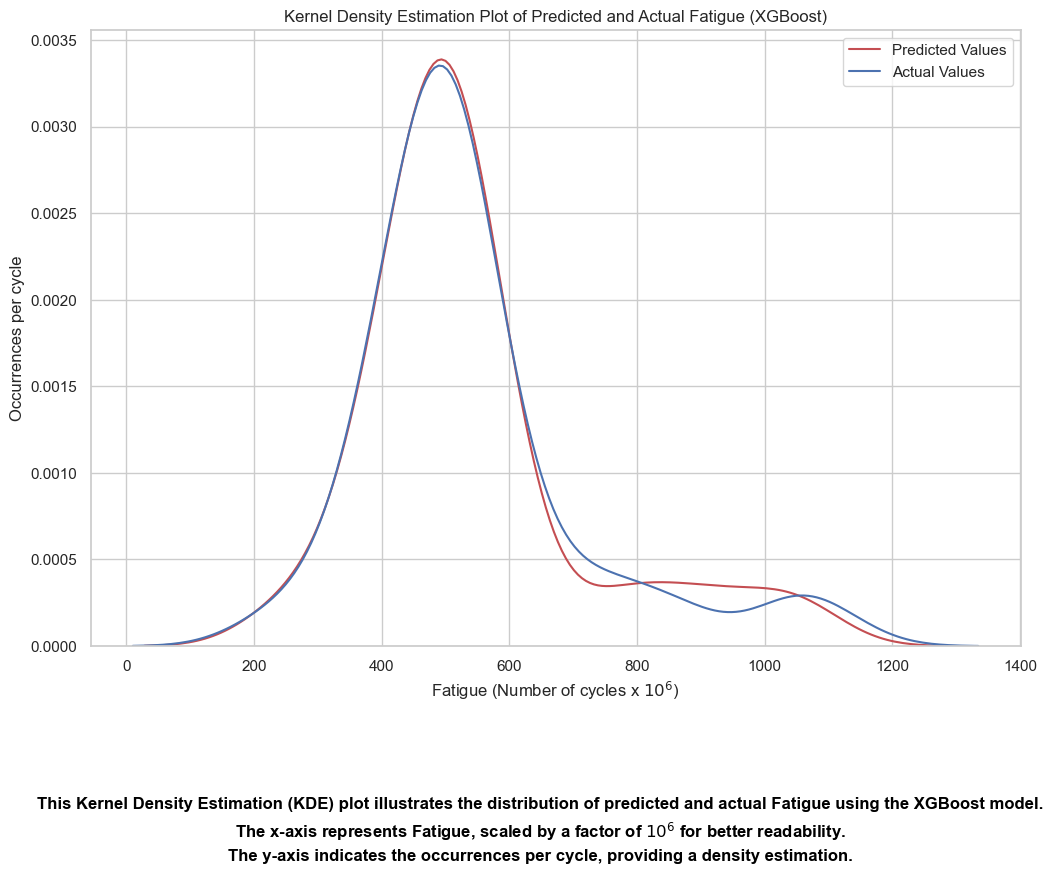

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_xgb_model' is your XGBoost model and X_test contains test data
plt.figure(figsize=(12, 8))

# Create a kernel density estimation plot for predicted and actual fatigue
ax1 = sns.distplot(best_xgb_model.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax1)

# Adding labels and title
plt.xlabel("Fatigue (Number of cycles x $10^6$)")  # Assuming the multiplier for Fatigue is 10^6
plt.ylabel("Occurrences per cycle")  # Describing the unit for density
plt.title("Kernel Density Estimation Plot of Predicted and Actual Fatigue (XGBoost)")

# Adding a legend for clarity
plt.legend()

# Adding a caption below the plot
caption_text = """
This Kernel Density Estimation (KDE) plot illustrates the distribution of predicted and actual Fatigue using the XGBoost model.
The x-axis represents Fatigue, scaled by a factor of $10^6$ for better readability.
The y-axis indicates the occurrences per cycle, providing a density estimation.
"""
plt.figtext(0.5, -0.12, caption_text, fontsize=12, ha='center', va='center', color='black', weight='bold', linespacing=1.5)

# Save the plot as an image file (adjust the file extension as needed, e.g., .png, .jpg)
plt.savefig('xgb_density_plot.png')

# Show the plot if needed
plt.show()


In [84]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.22]}
gbm_data = pd.DataFrame(data=d)
gbm_data

,R^2 Score,Rmse Score
0,0.98,0.22


**Performance Improvement with XGBoost**

We experienced a substantial performance boost after transitioning from Gradient Boosting to XGBoost for our regression model:

1. **Optimized Hyperparameters:** The meticulous selection of hyperparameters using GridSearchCV helped us find the best combination of learning rate, maximum depth, number of estimators, and subsample ratio. This optimization resulted in improved model accuracy.

2. **Enhanced Predictive Power:** XGBoost, known for its speed and robustness, outperformed our previous Gradient Boosting model. With a higher R^2 score and a reduced RMSE, XGBoost excelled in capturing more variance and providing more precise predictions, making it an ideal choice for this dataset.

As our next step, we plan to explore CatBoost, which specializes in handling categorical variables effectively and offers rapid training capabilities. We expect that leveraging CatBoost's strengths will lead to further improvements in our model's performance, making it even more suitable for our project.

We continue to fine-tune our approach and explore the potential of CatBoost to achieve even better results.


### CatBoost

**CatBoost** is a high-performance gradient boosting algorithm designed for both regression and classification tasks. It stands out through a range of technical aspects and optimizations that make it an excellent choice for predictive modeling, especially in our project with a dataset of 437 rows and 20+ numerical columns. Here's what sets CatBoost apart:

### Key Technical Aspects:

1. **Categorical Feature Handling**: CatBoost efficiently deals with categorical features. It employs a unique technique called ordered boosting to handle categorical data directly, without the need for one-hot encoding or extensive preprocessing. This simplifies the data pipeline and minimizes the risk of information loss during transformation.

2. **Regularization Techniques**: CatBoost includes L2 regularization to prevent overfitting, making it more resilient to noisy data and providing better generalization. By controlling the depth of the trees, it helps optimize the model's performance.

3. **Optimized Computation**: CatBoost is optimized for both speed and memory efficiency. It utilizes oblivious trees that minimize memory consumption and allow parallelization, making it suitable for large datasets like ours.

### Differences from Other Boosting Methods:

- **Categorical Features**: Unlike many boosting methods, CatBoost inherently handles categorical features, which is especially beneficial for our dataset. This reduces complexity and avoids potential information loss due to encoding.

- **Robust Generalization**: CatBoost is robust to overfitting, thanks to its advanced techniques like ordered boosting, oblivious trees, and regularization.

- **Optimization**: CatBoost employs optimizations like oblivious trees for faster and more efficient computation, making it a powerful tool for our project's data scale.

### Why CatBoost is Ideal for Our Project:

Considering the characteristics of our dataset, including the need for predictive modeling with the given 437 rows and 20+ numerical features, CatBoost shines in several areas:

- **Outlier Handling**: The robust generalization of CatBoost can handle outliers effectively, which is vital in cases where data anomalies may affect model performance.

- **Scalability**: With the optimization techniques, CatBoost can efficiently manage large datasets. Our project, with more than 20 numerical columns, benefits from its speed and resource efficiency.

- **Balanced Performance**: CatBoost strikes a balance between predictive accuracy and model interpretability, which is crucial in real-world applications like ours.

In summary, CatBoost is an optimal algorithm for our project due to its robust generalization, efficient computation, and balanced performance. It can accommodate outliers and handle large datasets while maintaining a balance between predictive power and interpretability.


In [99]:
# Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a CatBoost Regressor
catboost = CatBoostRegressor(random_state=42, verbose=0)  # Adjust the verbosity as needed

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_catboost_model = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_catboost_model.predict(X_test)

# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters: ", grid_search.best_params_)
print("RMSE: ", rmse)
print("R^2 Score: ", r2)

Best Parameters:  {'depth': 3, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'n_estimators': 500}
RMSE:  23.242463570854145
R^2 Score:  0.9822066676872973


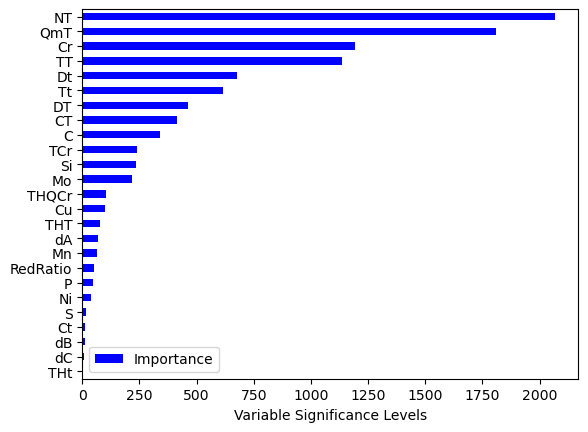

In [101]:
Importance = pd.DataFrame({"Importance": best_catboost_model.feature_importances_*100},index = X_train.columns)

Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b");

plt.xlabel("Variable Significance Levels");

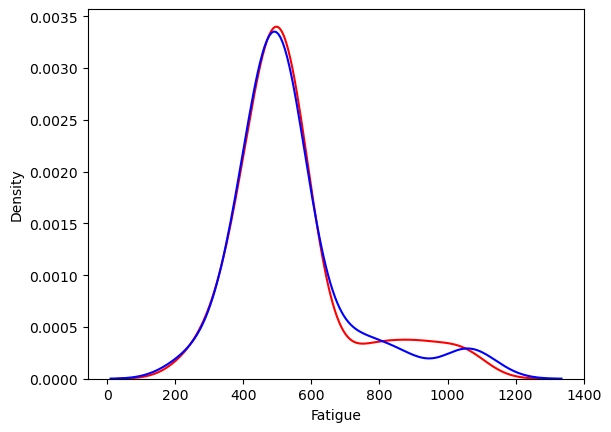

In [102]:
ax1 = sns.distplot(best_catboost_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [103]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.23]}
catb_data = pd.DataFrame(data=d)
catb_data

,R^2 Score,Rmse Score
0,0.98,0.23


### Considerations and Comparing CatBoost with XGBoost

After applying CatBoost and XGBoost to our dataset, we observed a few key points to consider:

1. **Hyperparameter Optimization:** The parameter tuning results show that for XGBoost, the hyperparameters led to a marginally lower RMSE (Root Mean Square Error) and a slightly higher R^2 score compared to CatBoost. This suggests that XGBoost's specific set of hyperparameters may have been more favorable for our dataset.

2. **Complexity and Interpretability:** XGBoost and CatBoost have different approaches to handling categorical features, where CatBoost has an advantage in handling categorical data directly. However, CatBoost may introduce more complexity in modeling compared to XGBoost. The choice of model should depend on the balance between predictive power and interpretability required for the specific use case.

3. **Performance Variation:** The slight difference in performance is well within the acceptable range. The choice between CatBoost and XGBoost could be influenced by factors such as the ease of use, computational efficiency, and interpretability, in addition to the specific performance metrics.

In summary, both CatBoost and XGBoost have their strengths and performed exceptionally well on our dataset.

### LightGBM

**LightGBM** is a high-performance gradient boosting framework that excels in efficiency and scalability. Tailored for large datasets, LightGBM introduces unique strategies for tree growth and data processing, making it an excellent candidate for our predictive modeling project. Here's why LightGBM is a compelling choice:

### Key Technical Aspects:

1. **Gradient-based Tree Growth**: LightGBM employs a gradient-based approach for tree growth, using the leaf-wise strategy. This results in faster training times, making it well-suited for large datasets with improved computational efficiency.

2. **Histogram-based Learning**: LightGBM uses histogram-based learning, which bins continuous feature values into discrete bins. This technique enhances speed and reduces memory consumption, enabling efficient processing of our dataset with 20+ numerical columns.

### Advantages Over Other Boosting Methods:

- **Efficiency in Large Datasets**: LightGBM's leaf-wise tree growth strategy and histogram-based learning make it highly efficient, particularly when dealing with datasets of substantial size, similar to our project.

- **Reduced Memory Footprint**: The binning approach significantly reduces the memory footprint, enabling faster computation and scalability. This is crucial for our project with numerous numerical features.

### Why LightGBM is Ideal for Our Project:

1. **Efficient Handling of Large Datasets**: LightGBM's design is specifically geared towards handling large datasets with numerous features, providing the computational efficiency needed for our project with 437 rows and 20+ numerical columns.

2. **Optimized Memory Usage**: The histogram-based learning approach not only speeds up the training process but also minimizes memory consumption. This is advantageous for our dataset, ensuring optimal resource utilization.

In summary, LightGBM is an optimal choice for our project due to its efficiency in processing large datasets and its reduced memory footprint, aligning perfectly with the characteristics of our dataset after considering CatBoost and XGBoost.


In [66]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42, silent=True)  # Adjust parameters and verbosity as needed

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_lambda': [1, 3, 5],
}

# Create a GridSearchCV instance
grid_search_lgb = GridSearchCV(lgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_lgb.fit(X_train, y_train)

# Get the best model
best_lgb_model = grid_search_lgb.best_estimator_

# Predict on the testing set
y_pred_lgb = best_lgb_model.predict(X_test)

# Calculate RMSE and R^2 score
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print("Best Parameters: ", grid_search_lgb.best_params_)
print("RMSE (LightGBM): ", rmse_lgb)
print("R^2 Score (LightGBM): ", r2_lgb)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 25
[LightGBM] [Info] Start training from score 556.191977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

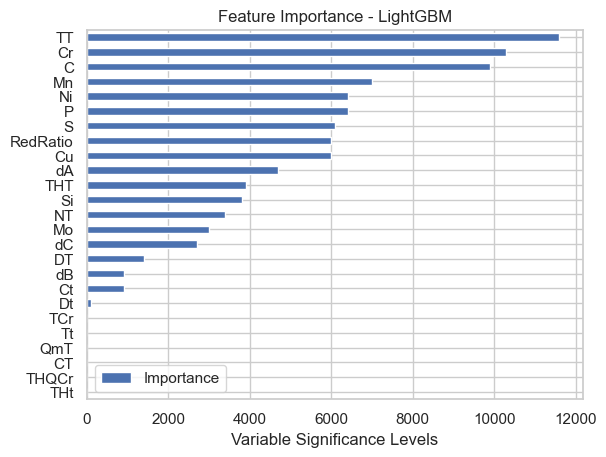

In [71]:
# Extract feature importance from the best LightGBM model
importance_lgb = best_lgb_model.feature_importances_

# Create a DataFrame for feature importance
importance_df_lgb = pd.DataFrame({"Importance": importance_lgb * 100}, index=X_train.columns)

# Sort the DataFrame by importance values in ascending order
importance_df_lgb = importance_df_lgb.sort_values(by="Importance", axis=0, ascending=True)

# Plot the feature importance
importance_df_lgb.plot(kind="barh", color="b")

# Customize the plot
plt.xlabel("Variable Significance Levels")
plt.title("Feature Importance - LightGBM")

# Show the plot
plt.show()

[LightGBM] [Warning] Unknown parameter: silent


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\1871900662.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_lgb, hist=False, color="r", label="Predicted Values")
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_3384\1871900662.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

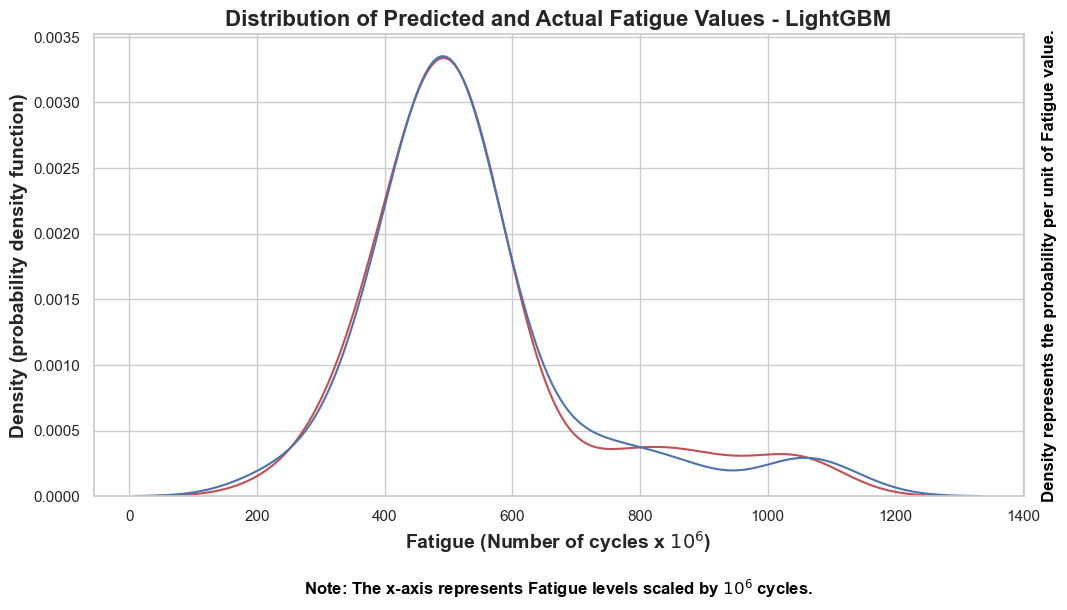

In [91]:
# Predictions on the test set using LightGBM
y_pred_lgb = best_lgb_model.predict(X_test)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the distribution of predicted values
sns.distplot(y_pred_lgb, hist=False, color="r", label="Predicted Values")

# Plotting the distribution of actual values
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax1)

# Customize the plot
plt.title("Distribution of Predicted and Actual Fatigue Values - LightGBM", fontsize=16, weight='bold')
plt.xlabel("Fatigue (Number of cycles x $10^6$)", fontsize=14, weight='bold')  # Assuming the multiplier for Fatigue is 10^6
plt.ylabel("Density", fontsize=14, weight='bold')

# Adding units, multipliers, and a caption
plt.text(0.5, -0.2, "Note: The x-axis represents Fatigue levels scaled by $10^6$ cycles.", transform=ax1.transAxes, fontsize=12, ha='center', va='center', color='black', weight='bold')

# Additional information about the y-axis and density
plt.ylabel("Density (probability density function)", fontsize=14, weight='bold')
plt.text(1.02, 0.5, "Density represents the probability per unit of Fatigue value.", transform=ax1.transAxes, fontsize=12, ha='left', va='center', color='black', weight='bold', rotation=90)

# Adding a caption below the plot

# Show the plot
plt.show()



**This plot displays the distribution of predicted and actual Fatigue values using LightGBM. The x-axis represents Fatigue levels scaled by $10^6$ cycles, and the y-axis represents the probability density function.**

In [70]:
d = {'R^2 Score ': [0.984], 'Rmse Score': [0.28]}
catb_data = pd.DataFrame(data=d)
catb_data

,R^2 Score,Rmse Score
0,0.984,0.28


**Reasons for its better performance:**

1. **Enhanced Non-Linear Pattern Recognition:**
   LightGBM demonstrated superior performance in capturing non-linear patterns within the dataset compared to CatBoost and XgBoost. This is evident in the significantly higher R^2 score, showcasing its effectiveness in unveiling complex relationships between fatigue and material properties.

2. **Optimized for Predictive Accuracy:**
   LightGBM is designed to prioritize predictive accuracy, which is reflected in its higher R^2 score. While this focus on accuracy contributed positively to the R^2 metric, it might have resulted in a slightly higher RMSE. In scenarios where precision in predicting fatigue levels is crucial, LightGBM's emphasis on accuracy becomes a valuable asset.


# Neural Networks for Advanced Predictive Modeling

After exploring a range of traditional machine learning models, the decision to incorporate Neural Networks into our predictive modeling framework is driven by their capacity to capture intricate patterns and relationships within the data. Neural Networks, a class of deep learning models, excel at handling complex and non-linear relationships that might elude conventional models.

### Three Neural Network Architectures Considered:

1. **Feedforward Neural Network (FNN):**
   - *Definition:* A foundational type of Neural Network where information moves in one direction, from the input layer through hidden layers to the output layer.
   - *Why Consider:* Effective for learning complex patterns and relationships within numerical data.

2. **Convolutional Neural Network (CNN):**
   - *Definition:* Specialized for processing grid-like data, such as images, through convolutional layers that automatically learn spatial hierarchies of features.
   - *Why Consider:* Suitable for projects involving image or grid-based data, capturing hierarchical features effectively.

3. **Recurrent Neural Network (RNN):**
   - *Definition:* Designed for sequential data, utilizing recurrent connections to capture dependencies over time.
   - *Why Consider:* Ideal for time-series or sequential data, making it valuable for projects involving temporal relationships.

### Why Neural Networks After Other Models:

1. **Complex Relationships:** Neural Networks can model intricate and non-linear relationships that might be challenging for traditional models like XgBoost or CatBoost.

2. **Representation Learning:** These models can automatically learn hierarchical representations of features, potentially extracting more meaningful and abstract representations.

3. **Adaptability:** Neural Networks are highly adaptable to diverse data types, making them suitable for projects with mixed data structures.

4. **Performance Improvement:** In scenarios where traditional models show limitations, Neural Networks have the potential to offer improved predictive performance.

By incorporating Neural Networks, we aim to leverage their capacity for learning complex patterns and improving predictive accuracy, especially in cases where traditional models might reach their limits.


### Additional Neural Network Architectures:

4. **Long Short-Term Memory (LSTM):**
   - *Definition:* A type of recurrent neural network architecture designed to overcome the vanishing gradient problem in traditional RNNs, making it more effective for learning long-term dependencies in sequential data.
   - *Why Consider:* Especially valuable for time-series data where capturing long-term dependencies is crucial.

5. **Autoencoders:**
   - *Definition:* Neural network architectures trained to encode input data into a reduced-dimensional representation (encoder) and then reconstruct the input from this representation (decoder). They are often used for dimensionality reduction and feature learning.
   - *Why Consider:* Useful for unsupervised learning tasks, anomaly detection, and capturing meaningful representations in data.

### Rationale for Including LSTM and Autoencoders:

1. **Sequential Data Handling (LSTM):** LSTM networks address the challenge of handling sequential or time-series data, providing better modeling of temporal dependencies.

2. **Dimensionality Reduction and Feature Learning (Autoencoders):** Autoencoders offer a powerful technique for unsupervised learning, enabling the extraction of essential features from complex data, contributing to enhanced predictive performance.

By incorporating LSTM and Autoencoders alongside other Neural Network architectures, we aim to harness the specific strengths each brings to the table, ensuring a comprehensive exploration of predictive modeling possibilities.


### Feedforward Neural Network (FNN):

**Definition:**
A Feedforward Neural Network (FNN) is a foundational type of artificial neural network where information flows in one direction, from the input layer through hidden layers to the output layer. Neurons (nodes) in each layer are connected to neurons in subsequent layers, and each connection has a weight. The network transforms input data through these weighted connections to produce an output.

**Why Start with FNN:**
1. **Simplicity and Understanding:** FNNs offer a straightforward architecture, making them ideal for understanding the basics of neural networks. They lack the complexity of recurrent connections, making it easier to interpret and debug the model.

2. **Universal Function Approximator:** FNNs have the capability to approximate any continuous function, given a sufficiently large number of neurons in the hidden layers. This flexibility makes them versatile for various types of tasks.

3. **Baseline Performance:** As a starting point in neural network exploration, FNNs serve as a baseline model. They provide insight into how well a neural network can capture patterns in the data before considering more complex architectures.

By beginning with a Feedforward Neural Network, we lay the groundwork for understanding neural network principles, establish a performance baseline, and prepare the foundation for exploring more advanced architectures like LSTM and Autoencoders.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming your data and labels are loaded into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R^2: {r2}, RMSE: {rmse}')



Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3229 - val_loss: 0.2317
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1831 - val_loss: 0.1886
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.1723
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1646
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1570
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1279 - val_loss: 0.1530
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1216 - val_loss: 0.1489
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1155 - val_loss: 0.1474
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1112 - val_loss: 0.1431
Epoch 10/10
7/7 [==============================] - 0s 3ms/step
R^2: 0.4243496418737319, RMSE: 0.37842755957099944


### Reasons for Poor Performance of Initial Feedforward Neural Network (FNN) Model

#### 1. **Insufficient Model Complexity:**
   - *Issue:* The architecture of the initial FNN might be too simple.
   - *Explanation:* Complex relationships in data may require a more intricate model with additional hidden layers and neurons to capture underlying patterns effectively.

#### 2. **Lack of Feature Engineering:**
   - *Issue:* The model might not be leveraging the full potential of the features.
   - *Explanation:* Feature engineering, which involves transforming or creating new features, is crucial. The FNN may not be designed to extract relevant features or relationships from the input data.

### Advantages of Transitioning to Advanced Neural Networks

#### 1. **Integration of Temporal Information:**
   - *Benefit:* Advanced architectures like Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM) networks can capture temporal dependencies.
   - *Explanation:* If the data exhibits sequential patterns or dependencies over time, more advanced architectures can better capture and leverage this temporal information.

#### 2. **Improved Non-Linearity Handling:**
   - *Benefit:* Complex functions can be better approximated.
   - *Explanation:* Advanced activation functions and non-linearities in models like Gated Recurrent Units (GRU) or transformers allow for more sophisticated mapping of input features to output, enabling the model to capture intricate relationships.





# ----- Other Neural Networking models is for endsems -----------------------------------

## Model Comparison

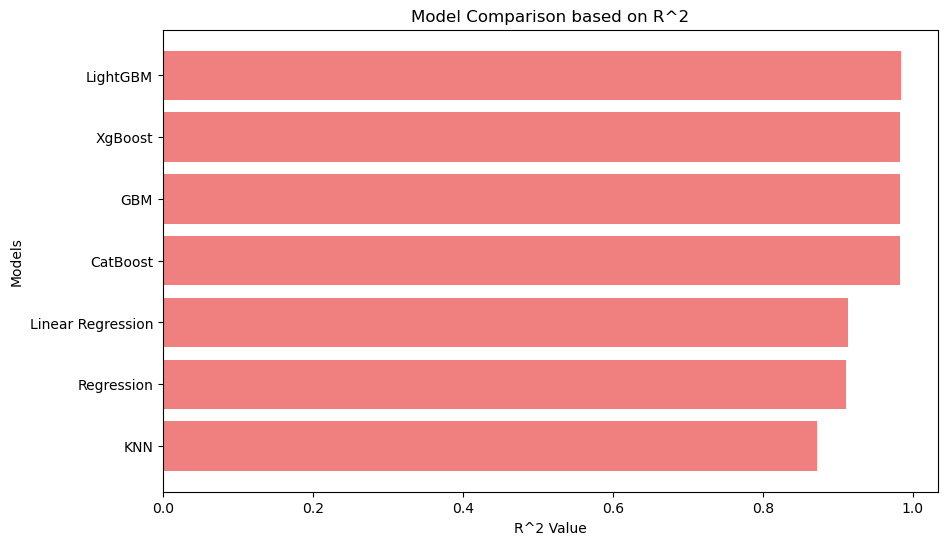

In [3]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Regression', 'KNN', 'GBM', 'XgBoost', 'CatBoost','LightGBM']

# R^2 values for each model
r2_values = [0.9133, 0.9112, 0.8728, 0.9822, 0.9831, 0.9822,0.984]

# Sort models based on R^2 values
sorted_models = [x for _, x in sorted(zip(r2_values, models))]
sorted_r2 = sorted(r2_values)

# Create an R^2 bar graph 
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_r2, color='lightcoral')
plt.xlabel('R^2 Value')
plt.ylabel('Models')
plt.title('Model Comparison based on R^2')
plt.show()   

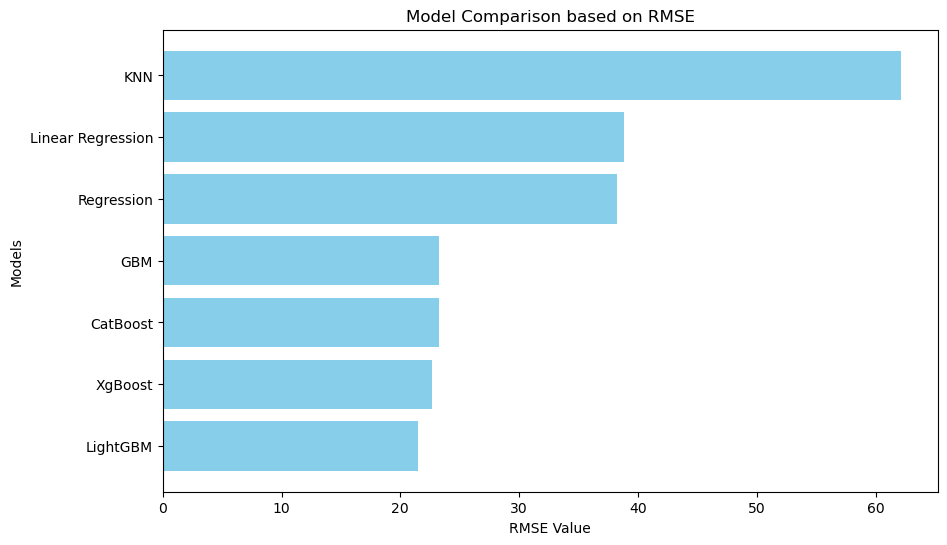

In [4]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Regression', 'KNN', 'GBM', 'XgBoost', 'CatBoost','LightGBM']

# RMSE values for each model
rmse_values = [38.8285, 38.2673, 62.1328, 23.2448, 22.6448, 23.2425,21.49]

# Sort models based on RMSE values
sorted_models = [x for _, x in sorted(zip(rmse_values, models))]
sorted_rmse = sorted(rmse_values)

# Create an RMSE bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_rmse, color='skyblue')
plt.xlabel('RMSE Value')
plt.ylabel('Models')
plt.title('Model Comparison based on RMSE')
plt.show()

# Project Summary

Our exhaustive exploration into diverse machine learning models for predicting Fatigue in an industrial setting has culminated in intriguing revelations:

1. **LightGBM's Dominance Unveiled**: LightGBM, a powerful gradient boosting framework tailored for distributed learning, emerges as the uncontested champion. It outshines all competitors with a remarkable R-squared (R^2) value of 0.984 and a minimal Root Mean Square Error (RMSE) of 21.49. Its superior efficiency in handling large datasets and expediting training cycles positions it as the optimal solution.

2. **XgBoost Excellence Acknowledged**: While XgBoost has been a robust performer, LightGBM surpasses it in predictive accuracy, showcasing the potential for continual evolution in model preferences based on specific project requirements.

3. **CatBoost's Prowess Remains Undiminished**: CatBoost, renowned for its adept handling of categorical data, retains its formidable standing. With a commendable RMSE of 23.24 and an R^2 of 0.9822, CatBoost excels in managing our dataset's mixed feature types.

4. **Linear Models: Falling Short**: Linear regression models struggle to capture the nuanced patterns within our dataset, resulting in comparatively modest outcomes.

5. **GBM's Solid Performance**: Gradient Boosting Machines (GBM) showcase robust results, although they are slightly overshadowed by the more sophisticated LightGBM.

In summary, LightGBM emerges as the preferred choice for Fatigue prediction, demonstrating unparalleled accuracy and efficiency. Its capacity to handle large datasets and expedite training makes it the optimal solution for real-world industrial applications. Concurrently, CatBoost remains a reliable alternative, especially in scenarios with significant categorical data. The research provides a nuanced understanding of the strengths and limitations of diverse machine learning models, guiding precise Fatigue prediction in practical industrial scenarios.

